Projet OC n°3 : Préparez des données pour un organisme de santé publique
========================================================================

I. Présentation générale du jeu de données
******************************************

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Chargement des données
data_path = '../Data/fr.openfoodfacts.org.products.csv'
data = pd.read_csv(data_path, delimiter='\t', low_memory=False)

In [3]:
# Afficher toutes les colonnes et les lignes
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [4]:
# Récupération des dimensions du DataFrame
datas = data.shape
columns = datas[1]
rows = datas[0]

# Comptage des types de données
data_type = data.dtypes.value_counts()
var_qual = data_type.iloc[1]
var_quant = data_type.iloc[0]

# Calcul du nombre total de valeurs
values = data.size

# Affichage des informations importantes
print("\033[1m" + "\033[91m" + "Informations importantes :" + "\033[0m" + "\n")
print(f"Total colonnes : {columns} variables.\n")
print(f"    -> {var_qual} variables qualitatives.")
print(f"    -> {var_quant} variables quantitatives.")
print(f"\nTotal lignes : {rows} individus.")
print(f"\nTotal : {values} valeurs.")

Informations importantes :

Total colonnes : 162 variables.

    -> 56 variables qualitatives.
    -> 106 variables quantitatives.

Total lignes : 320772 individus.

Total : 51965064 valeurs.


<Axes: >

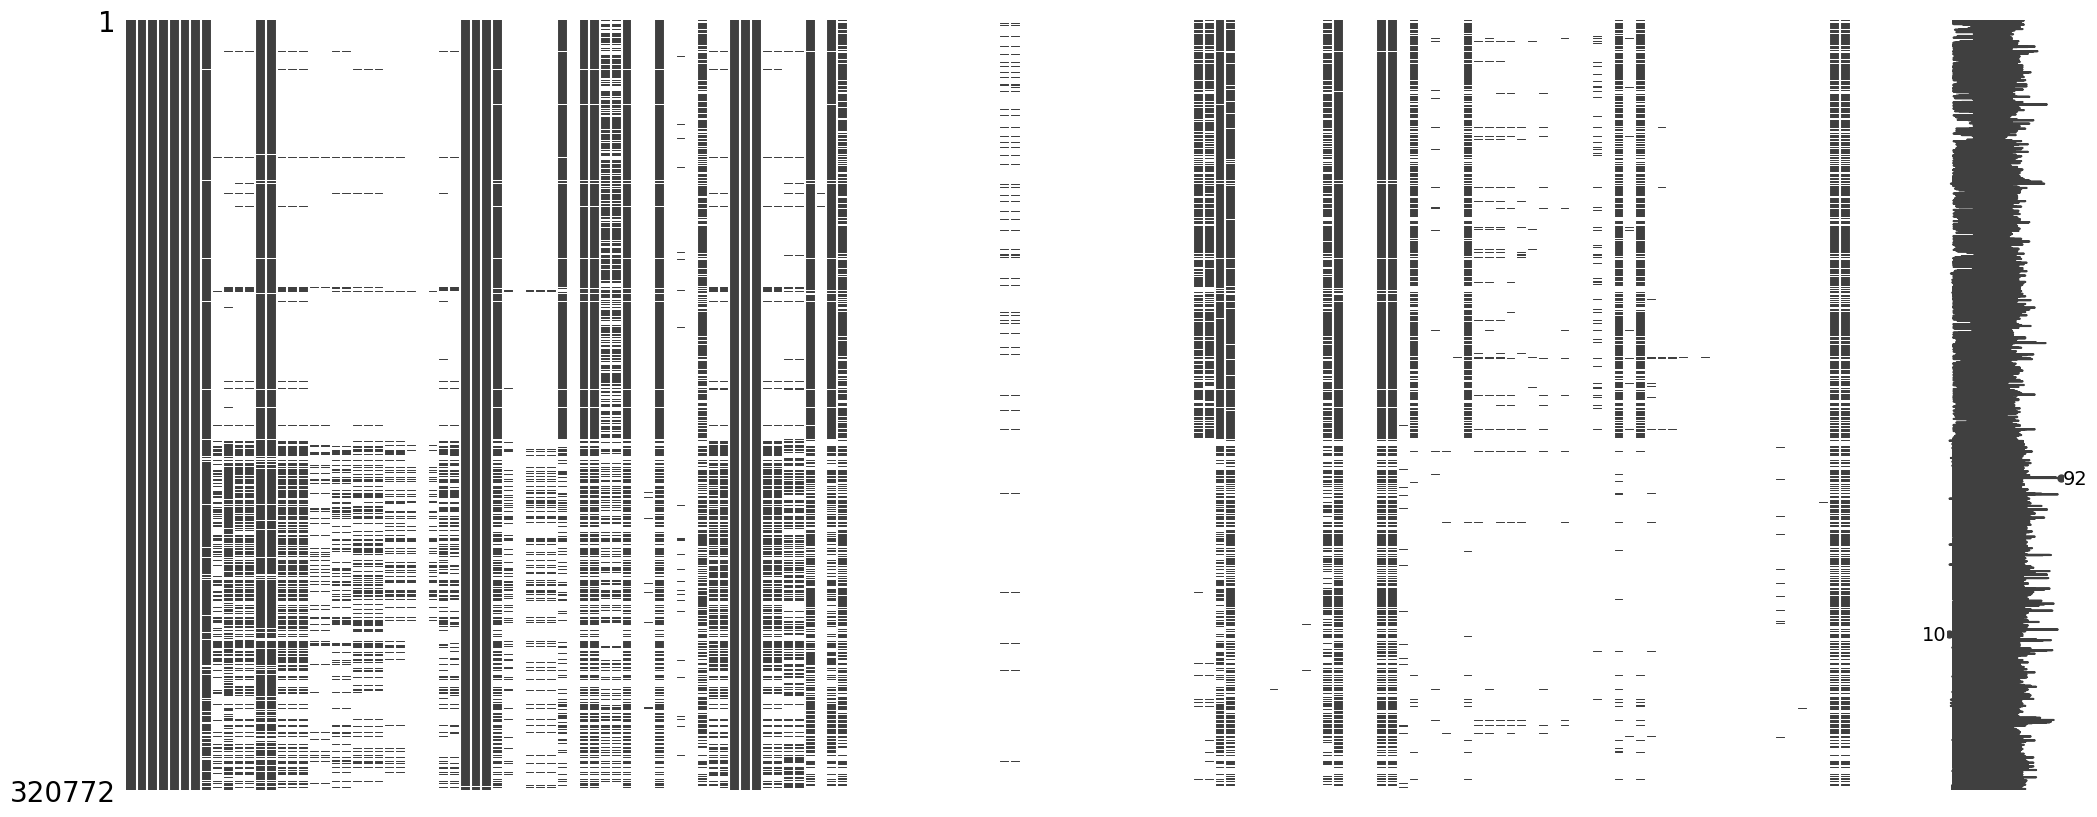

In [5]:
msno.matrix(data)

In [6]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [7]:
# Sélection des variables qualitatives
var_qual = data.select_dtypes('object')

# Affichage de la description des variables qualitatives
print("Description des variables qualitatives : \n")
for var in var_qual:
    print(var.upper(), " : ", data[var].nunique())
    print(data[var].unique(), "\n")

Description des variables qualitatives : 

CODE  :  320749
['0000000003087' '0000000004530' '0000000004559' ... '9970229501521'
 '9980282863788' '999990026839'] 

URL  :  320749
['http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao'
 'http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole'
 'http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser'
 ...
 'http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7'
 'http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr'
 'http://world-fr.openfoodfacts.org/produit/999990026839/sugar-free-drink-mix-peach-tea-market-pantry'] 

CREATOR  :  3535
['openfoodfacts-contributors' 'usda-ndb-import' 'date-limite-app' ...
 'zmorlock' 'robopetr' 'mmarquesma'] 

CREATED_T  :  189567
['1474103866' '1489069957' '1489055731' ... '1490631299' '1422099377'
 

II. Démarche méthodologique de nettoyage des données
****************************************************

A. Identification et traitement des doublons


In [8]:
print("Nombre de ligne en double : ", data.duplicated().sum())

Nombre de ligne en double :  0


In [9]:
for var in data.columns:
    # Calcul du nombre de doublons dans la colonne
    nb_duplicates = data[var].dropna().duplicated().sum()
    # Récupération des valeurs dupliquées
    duplicates = data[var].where(data[var].duplicated()).unique()

    # Affichage des informations sur les doublons
    if nb_duplicates > 0:
        print(var, ':', nb_duplicates, 'duplications')
        print('exemples :', duplicates, '\n')

creator : 317235 duplications
exemples : [nan 'usda-ndb-import' 'tacinte' ... 'patxico' 'nbunpa' 'razorlv'] 

created_t : 131202 duplications
exemples : [nan '1489069957' '1489055651' ... '1473945917' '1490554697' '1490554698'] 

created_datetime : 131195 duplications
exemples : [nan '2017-03-09T14:32:37Z' '2017-03-09T10:34:11Z' ...
 '2016-09-15T13:25:17Z' '2017-03-26T18:58:17Z' '2017-03-26T18:58:18Z'] 

last_modified_t : 140277 duplications
exemples : [nan '1489069957' '1489055651' ... '1487256330' '1491244498' '1491244499'] 

last_modified_datetime : 140277 duplications
exemples : [nan '2017-03-09T14:32:37Z' '2017-03-09T10:34:11Z' ...
 '2017-02-16T14:45:30Z' '2017-04-03T18:34:58Z' '2017-04-03T18:34:59Z'] 

product_name : 81663 duplications
exemples : [nan 'Peanuts' 'Biscuit' ... 'Attiéké' 'nf test'
 'Sugar Free Drink Mix, Peach Tea'] 

generic_name : 14211 duplications
exemples : [nan 'Sliced Bread' 'A low glycemic sweetener' ... 'Crème de Coco'
 "Sauce prête à l'emploi" 'Bière carib

In [10]:
# Calcul du nombre de doublons basés sur "product_name" et "brands"
brand_product_name = data.duplicated(subset=["product_name", "brands"]).sum()
print("Nombre de doublons avec même 'product_name' & 'brands' : ", brand_product_name)

# Affichage de la forme du DataFrame avant suppression des doublons
print("Data shape avant suppression des doublons avec même 'product_name' & 'brands' : ", data.shape)

# Suppression des doublons basés sur "product_name" et "brands"
data.drop_duplicates(subset=["product_name", "brands"], inplace=True)

# Affichage de la forme du DataFrame après suppression des doublons
print("Data shape après suppression des doublons avec même 'product_name' & 'brands' : ", data.shape)

Nombre de doublons avec même 'product_name' & 'brands' :  37140
Data shape avant suppression des doublons avec même 'product_name' & 'brands' :  (320772, 162)
Data shape après suppression des doublons avec même 'product_name' & 'brands' :  (283632, 162)


B. Identification et traitement des valeurs manquantes


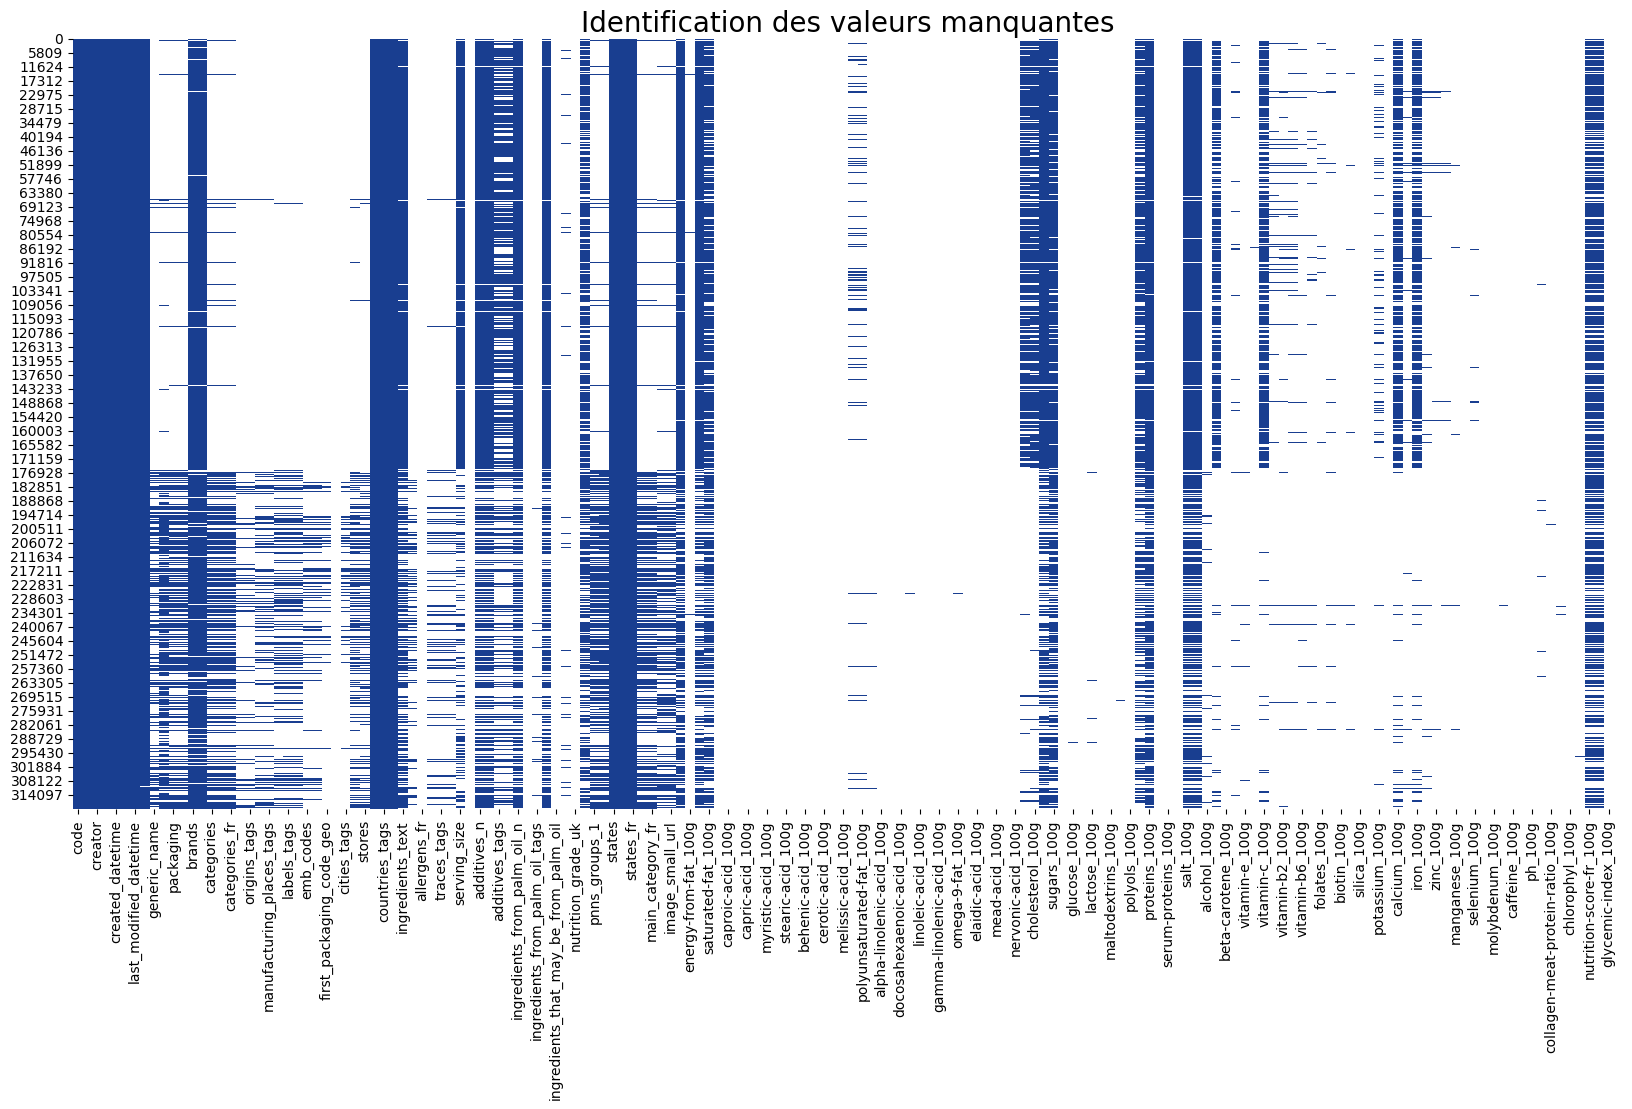

In [11]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#193E90", "white"]
sns.heatmap(data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

In [12]:
# Initialisation du dictionnaire pour stocker les informations de complétion
completion = {}

# Calcul du nombre de valeurs non nulles, de valeurs manquantes et du pourcentage de valeurs manquantes pour chaque colonne
for var in data.columns:
    nbr_values = data[var].notna().sum()
    na_values = data[var].isna().sum()
    na_percent = 100 * na_values / data.shape[0]
    completion[var] = [nbr_values, na_percent]
    
# Affichage des informations de complétion pour chaque colonne
print('column_name : nbr_values -> percentage_of_Na', '\n')
for var in completion:
    nbr_values = completion[var][0]
    na_percent = completion[var][1]
    print(f'{var} : {nbr_values}  -> {int(na_percent)}% Na')

column_name : nbr_values -> percentage_of_Na 

code : 283628  -> 0% Na
url : 283628  -> 0% Na
creator : 283631  -> 0% Na
created_t : 283632  -> 0% Na
created_datetime : 283629  -> 0% Na
last_modified_t : 283632  -> 0% Na
last_modified_datetime : 283632  -> 0% Na
product_name : 282490  -> 0% Na
generic_name : 50623  -> 82% Na
quantity : 99978  -> 64% Na
packaging : 75425  -> 73% Na
packaging_tags : 75426  -> 73% Na
brands : 271628  -> 4% Na
brands_tags : 271620  -> 4% Na
categories : 80369  -> 71% Na
categories_tags : 80365  -> 71% Na
categories_fr : 80369  -> 71% Na
origins : 21353  -> 92% Na
origins_tags : 21320  -> 92% Na
manufacturing_places : 35267  -> 87% Na
manufacturing_places_tags : 35262  -> 87% Na
labels : 44818  -> 84% Na
labels_tags : 44900  -> 84% Na
labels_fr : 44904  -> 84% Na
emb_codes : 28130  -> 90% Na
emb_codes_tags : 28126  -> 90% Na
first_packaging_code_geo : 18067  -> 93% Na
cities : 4  -> 99% Na
cities_tags : 19497  -> 93% Na
purchase_places : 55490  -> 80% Na
st

In [13]:
total_na = data.isna().sum().sum()
total_percent_na = (data.isna().sum().sum() * 100 / data.size).round(2) 
print("Nombre total de valeurs manquantes dans le dataset = ", total_na, "environ", total_percent_na, "% du datasat.")

Nombre total de valeurs manquantes dans le dataset =  34689989 environ 75.5 % du datasat.


In [14]:
c = 0
for var in completion:
    nbr_values = completion[var][0]
    na_percent = completion[var][1]
    if na_percent >= 50:
        c = c + 1

print("Nombre de colonnes avec plus de 50% de valeur manquante : ", c)

Nombre de colonnes avec plus de 50% de valeur manquante :  126


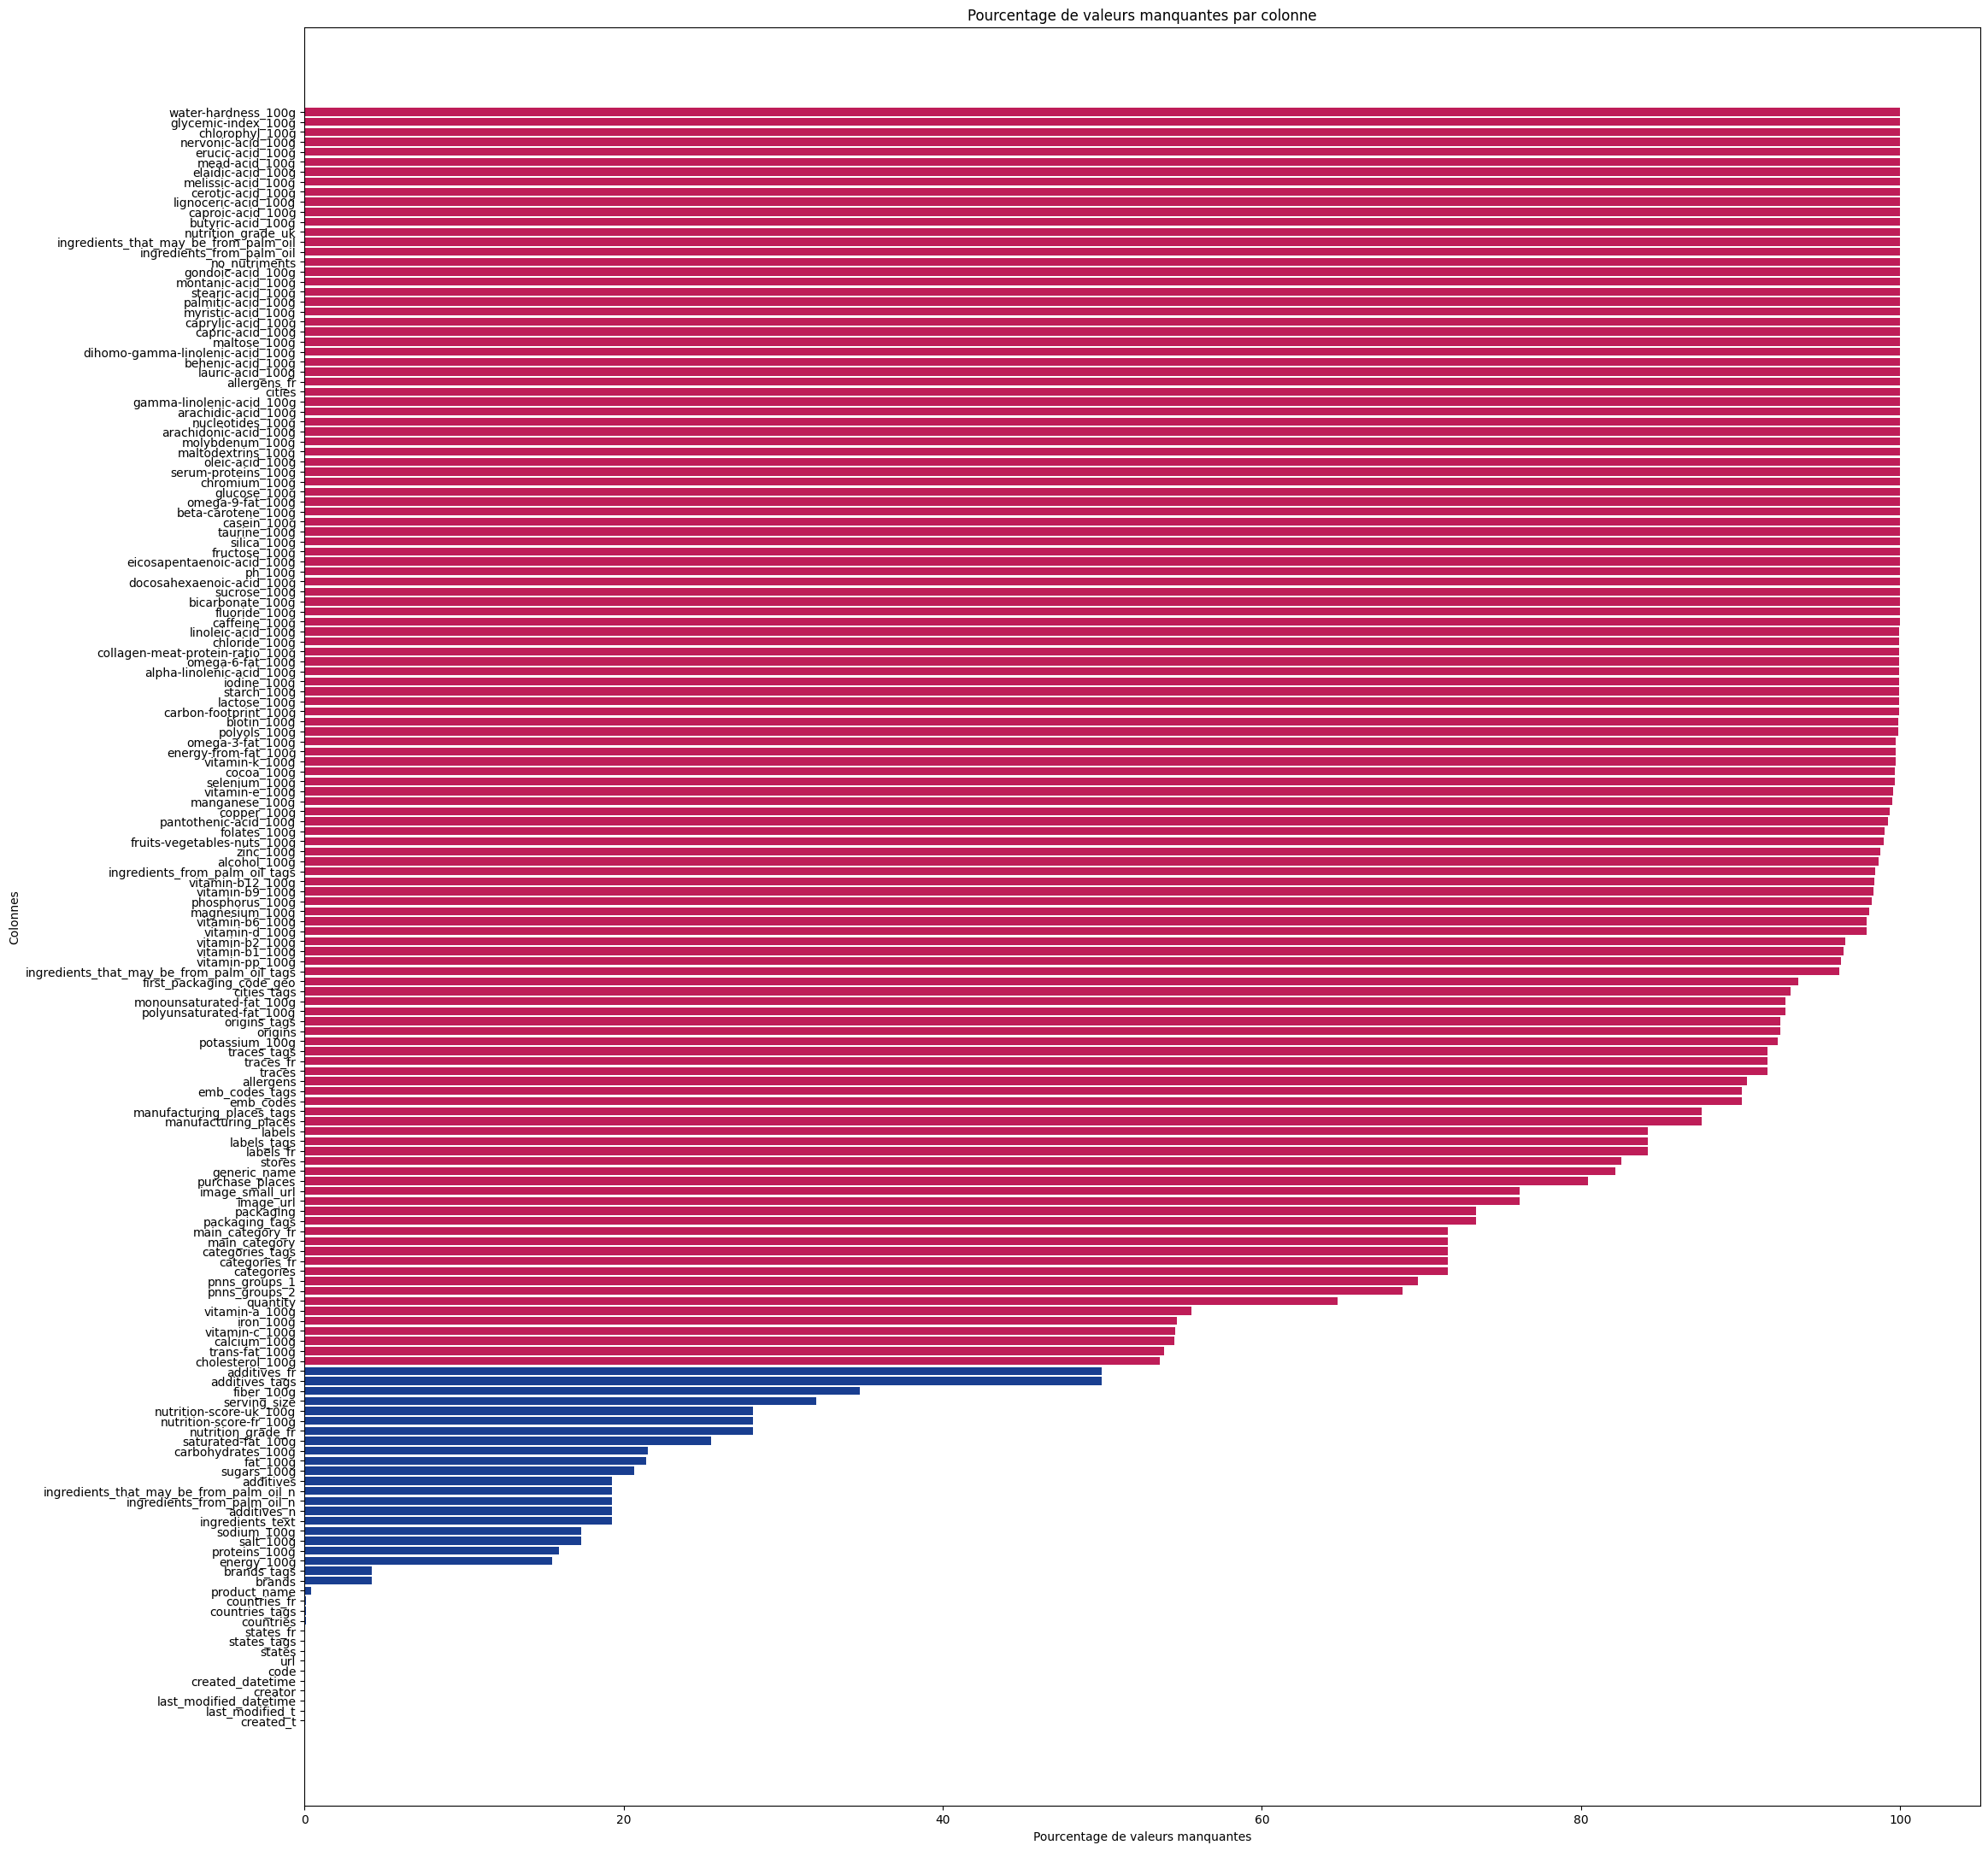

In [15]:
column_completion = {}
for var in data.columns:
    na_values = data[var].isna().sum()
    na_percent = 100 * na_values / data.shape[0]
    column_completion[var] = na_percent

# Extraire les clés et les valeurs du dictionnaire
keys = list(column_completion.keys())
values = list(column_completion.values())

# Tri des données par pourcentage de valeurs manquantes
sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
keys_sorted = [keys[i] for i in sorted_indices]
values_sorted = [values[i] for i in sorted_indices]

# Créer le graphique à barres en utilisant les listes triées keys_sorted et values_sorted en mettant en évidence les variables avec plus de 50% de Na
plt.barh(keys_sorted, values_sorted, color=['#BE1D58' if value > 50 else '#193E90' for value in values_sorted])

# Ajouter des étiquettes aux axes et un titre
plt.ylabel('Colonnes')  # L'axe y est maintenant les colonnes
plt.xlabel('Pourcentage de valeurs manquantes')
plt.title('Pourcentage de valeurs manquantes par colonne')

# Définir la limite de l'axe x pour commencer à 0
plt.xlim(left=0)
plt.tight_layout(pad=-60)

# Afficher le graphique
plt.show()

In [16]:
# Création d'une liste des colonnes avec un pourcentage de valeurs manquantes supérieur ou égal à 50%
columns_too_empty = [column for column, percent in completion.items() if percent[1] >= 50]

# Affichage des colonnes avec un pourcentage de valeurs manquantes élevé
columns_too_empty

['generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_uk',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'main_category_fr',
 'image_url',
 'image_small_url',
 'energy-from-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-ac

In [17]:
# Affiche le nombre de colonnes avec plus de 50% de valeurs manquantes
print("Nombre de colonnes avec plus de 50% de valeur manquante : ", len(columns_too_empty), "\n")

# Affiche la forme du DataFrame avant la suppression des colonnes inutiles avec plus de 50% de valeurs manquantes
print("Data shape avant exclusion des variables inutiles avec plus de 50% de valeurs manquantes : ", data.shape)

# Supprime les colonnes inutiles avec plus de 50% de valeurs manquantes
data.drop(columns=columns_too_empty, inplace=True)

# Affiche la forme du DataFrame après la suppression des colonnes inutiles avec plus de 50% de valeurs manquantes
print("Data shape après exclusion des variables inutiles avec plus de 50% de valeurs manquantes : ", data.shape)

Nombre de colonnes avec plus de 50% de valeur manquante :  126 

Data shape avant exclusion des variables inutiles avec plus de 50% de valeurs manquantes :  (283632, 162)
Data shape après exclusion des variables inutiles avec plus de 50% de valeurs manquantes :  (283632, 36)


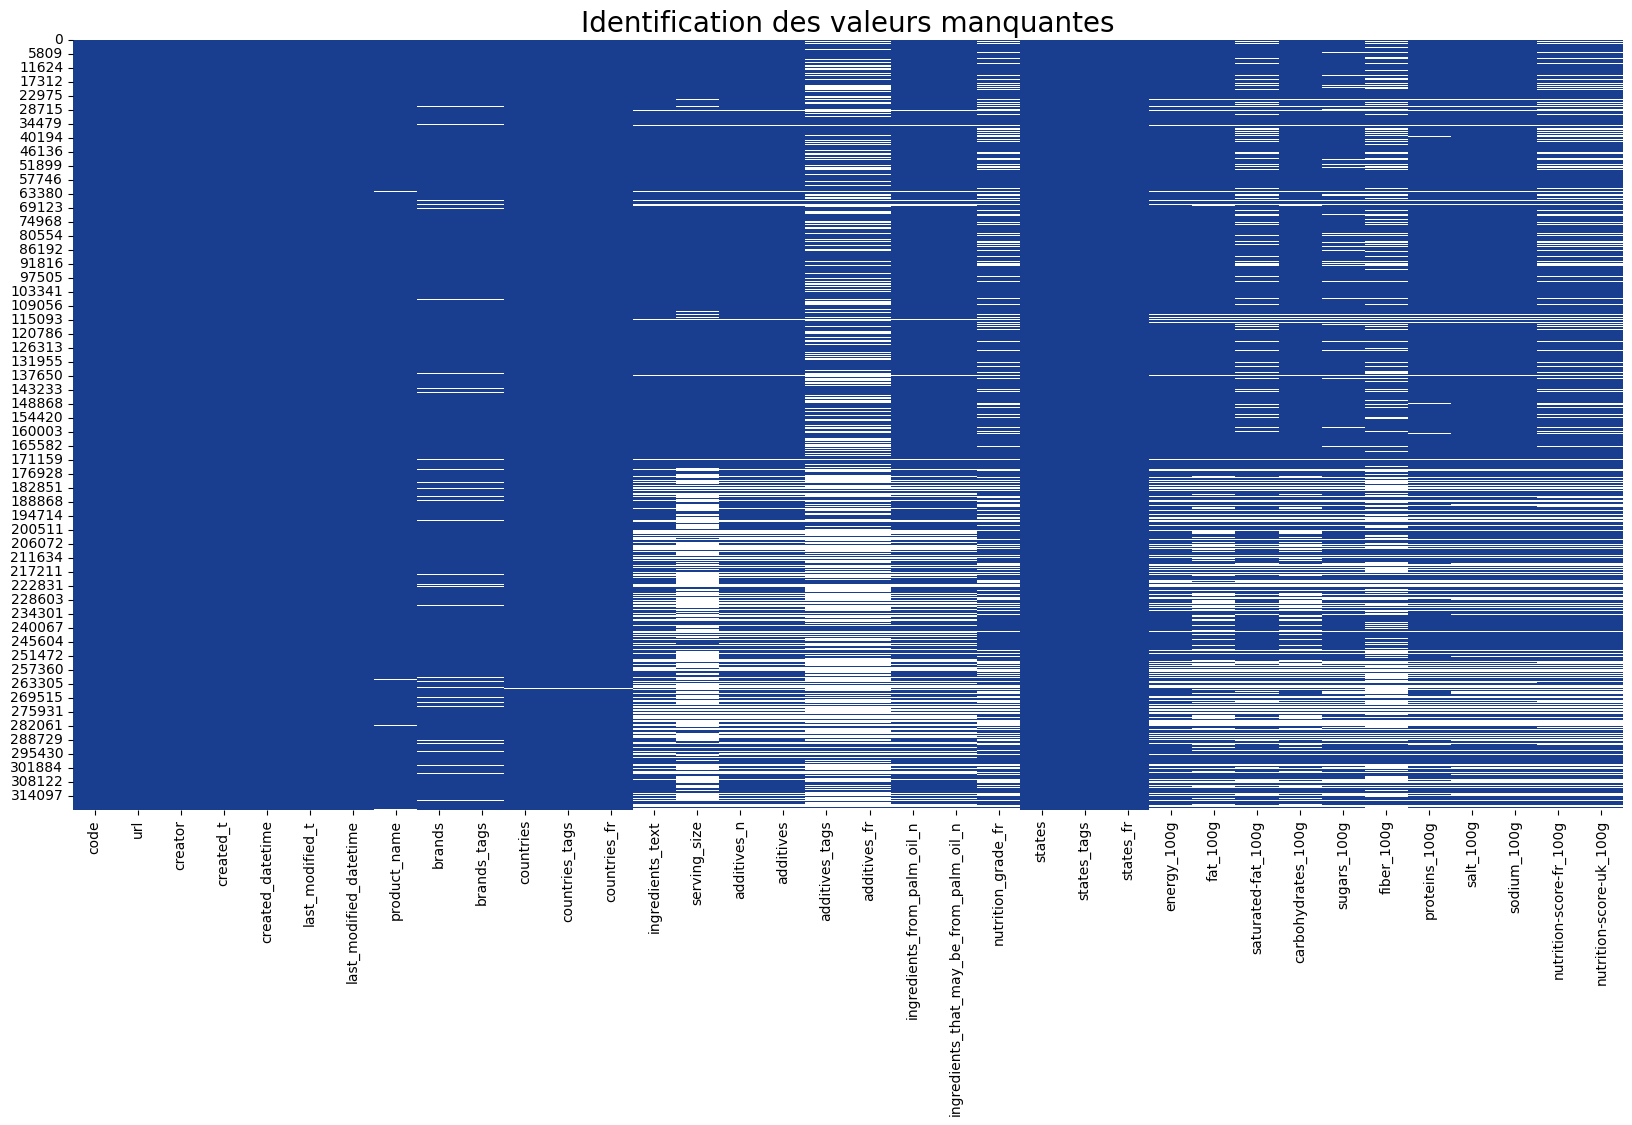

In [18]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#193E90", "white"]
sns.heatmap(data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

In [19]:
# Initialisation du dictionnaire pour stocker les informations de complétion pour chaque ligne
line_completion = {}

# Initialisation du compteur de lignes avec plus de 50% de valeurs manquantes
l = 0

# Parcours de chaque ligne du DataFrame
for index, row in data.iterrows():
    # Calcul du nombre de valeurs manquantes dans la ligne
    na_values = row.isna().sum()
    # Calcul du pourcentage de valeurs manquantes dans la ligne
    na_percent = 100 * na_values / data.shape[1]
    # Enregistrement du pourcentage de valeurs manquantes pour la ligne
    line_completion[index] = na_percent
    # Vérification si le pourcentage de valeurs manquantes dans la ligne est supérieur ou égal à 50%
    if na_percent >= 50:
        # Incrémentation du compteur de lignes avec plus de 50% de valeurs manquantes
        l += 1

# Affichage du nombre de lignes avec plus de 50% de valeurs manquantes
print("Nombre de lignes avec plus de 50% de valeur manquante : ", l)

Nombre de lignes avec plus de 50% de valeur manquante :  30243


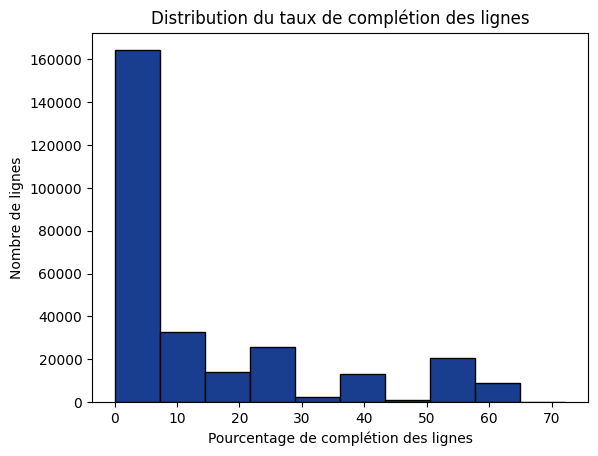

In [20]:
# Extraction des clés (index des lignes) et des valeurs (pourcentages de complétion)
keys_sorted = sorted(line_completion.keys())
values_sorted = [line_completion[key] for key in keys_sorted]

# Création de l'histogramme des pourcentages de complétion des lignes
plt.hist(values_sorted, bins=10, color='#193E90', edgecolor='black')

# Ajout des étiquettes aux axes et d'un titre
plt.xlabel('Pourcentage de complétion des lignes')
plt.ylabel('Nombre de lignes')
plt.title('Distribution du taux de complétion des lignes')

# Affichage du graphique
plt.show()

In [21]:
# Création d'une liste des lignes avec un pourcentage de valeurs manquantes supérieur ou égal à 50%
lines_too_empty = [index for index, percent in line_completion.items() if percent >= 50]

# Affichage des lignes avec un pourcentage de valeurs manquantes élevé
lines_too_empty

[0,
 46,
 48,
 136,
 183,
 193,
 194,
 217,
 224,
 225,
 232,
 271,
 304,
 362,
 412,
 414,
 415,
 426,
 427,
 431,
 433,
 434,
 437,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 460,
 462,
 468,
 474,
 497,
 506,
 510,
 511,
 513,
 514,
 533,
 543,
 545,
 547,
 557,
 560,
 566,
 567,
 568,
 582,
 605,
 625,
 633,
 635,
 649,
 656,
 661,
 662,
 666,
 715,
 841,
 889,
 913,
 1050,
 1051,
 1344,
 1357,
 1365,
 1389,
 1641,
 1649,
 1654,
 1661,
 1701,
 1712,
 4075,
 4098,
 4728,
 5029,
 6660,
 7306,
 7307,
 7308,
 7361,
 7375,
 7384,
 8760,
 9597,
 9602,
 9761,
 9832,
 9859,
 9860,
 9893,
 9894,
 10197,
 10251,
 10252,
 10254,
 10255,
 10264,
 10291,
 10303,
 10323,
 10355,
 10366,
 10373,
 10377,
 10380,
 10384,
 10386,
 10389,
 10390,
 10392,
 10396,
 10399,
 10400,
 10401,
 10447,
 10448,
 10465,
 10472,
 10508,
 10510,
 10626,
 10630,
 10632,
 10635,
 10637,
 10741,
 10789,
 10790,
 10794,
 10798,
 10836,
 10838,
 10982,
 10983,
 10984,
 11013,
 11242,
 11243,
 11245,
 11253,
 112

In [22]:
# Affiche le nombre de lignes avec plus de 50% de valeurs manquantes
print("Nombre de lignes avec plus de 50% de valeur manquante : ", l, "\n")

# Affiche la forme du DataFrame avant la suppression des lignes inutiles avec plus de 50% de valeurs manquantes
print("Data shape avant exclusion des individus inutiles avec plus de 50% de valeurs manquantes : ", data.shape)

# Supprime les lignes inutiles avec plus de 50% de valeurs manquantes
data.drop(index=lines_too_empty, inplace=True)

# Affiche la forme du DataFrame après la suppression des lignes inutiles avec plus de 50% de valeurs manquantes
print("Data shape après exclusion des individus inutiles avec plus de 50% de valeurs manquantes : ", data.shape)

Nombre de lignes avec plus de 50% de valeur manquante :  30243 

Data shape avant exclusion des individus inutiles avec plus de 50% de valeurs manquantes :  (283632, 36)
Data shape après exclusion des individus inutiles avec plus de 50% de valeurs manquantes :  (253389, 36)


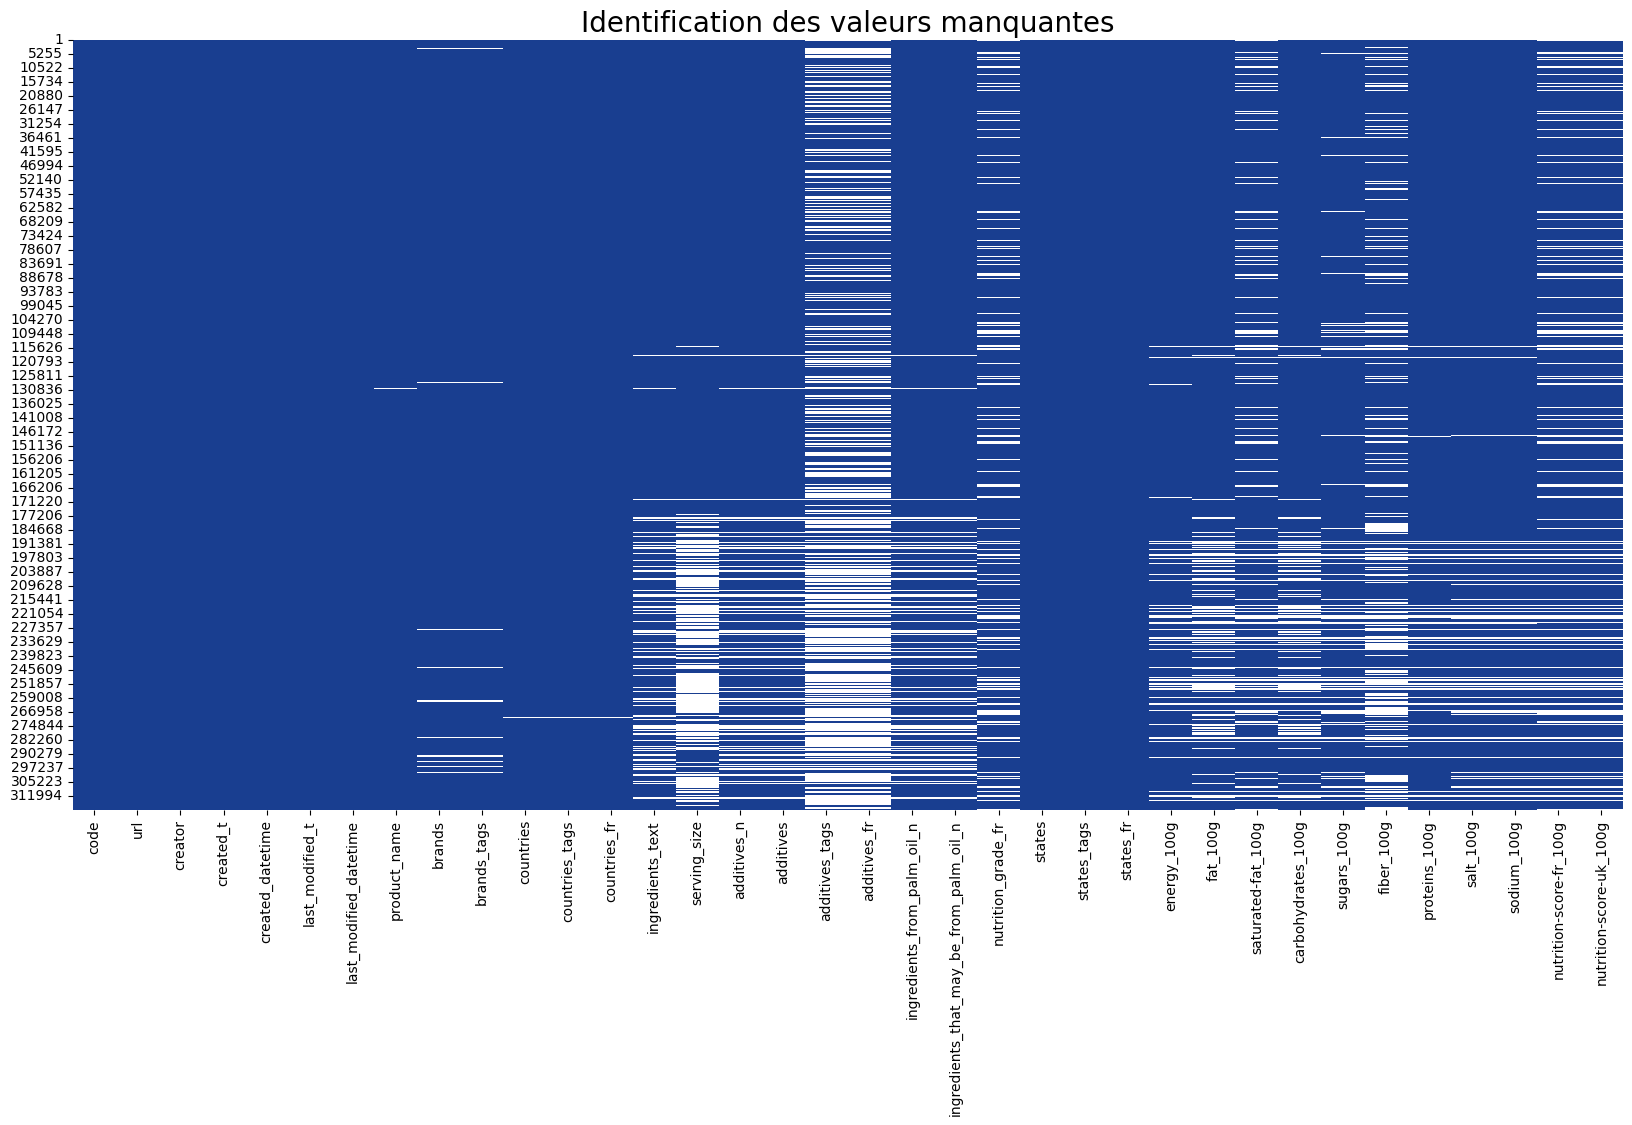

In [23]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#193E90", "white"]
sns.heatmap(data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

In [24]:
total_na = data.isna().sum().sum()
total_percent_na = (data.isna().sum().sum() * 100 / data.size).round(2) 
print("Nombre total de valeurs manquantes dans le dataset = ", total_na, "environ", total_percent_na, "% du datasat.")

Nombre total de valeurs manquantes dans le dataset =  829779 environ 9.1 % du datasat.


In [25]:
# Renomme les colonnes en remplaçant les tirets par des underscores
data = data.rename(columns=lambda x: x.replace('-', '_'))

# Crée une copie profonde du DataFrame data
cleaned_data = data.copy(deep=True)

# Enregistre le DataFrame cleaned_data dans un fichier CSV
cleaned_data.to_csv("../Data/cleaned_data.csv")

C. Identification et traitement des valeurs aberrantes et atypiques

    a. Valeurs aberrantes

Etude Métier : 
- pour l'énergie : la substance ayant le plus d'énergie sont les lipides avec 3700kJ pour 100g
- pour les nutriments : la quantité de nutriment pour 100g de produit ne peut pas dépasser 100g
les valeurs supérieures sont considérées comme aberrantes


In [26]:
def box_plot(data, var, color, title):
    """
    Fonction pour tracer un boxplot.

    Parameters:
        data (DataFrame): Le DataFrame contenant les données.
        var (str): Le nom de la variable à tracer.
        color (str): La couleur à utiliser pour le boxplot.
        title (str): Le titre du graphique.

    Returns:
        None
    """
    # Vérifie si le titre contient le mot 'column'
    if 'column' in title:
        # Si oui, remplace 'column' par une chaîne vide
        title = title.replace('column', '')
        # Trace le boxplot pour la variable spécifiée
        data.boxplot(column=var, color=color)
    else:
        # Sinon, trace le boxplot en fonction de la variable spécifiée
        sns.boxplot(x=var, data=data, color=color)
    # Ajoute le titre au graphique
    plt.title(title)

def histogram_plot(data, var, color, x_label, y_label, title):
    """
    Fonction pour tracer un histogramme.

    Parameters:
        data (DataFrame): Le DataFrame contenant les données.
        var (str): Le nom de la variable à tracer.
        color (str): La couleur à utiliser pour l'histogramme.
        x_label (str): L'étiquette de l'axe des abscisses.
        y_label (str): L'étiquette de l'axe des ordonnées.
        title (str): Le titre du graphique.

    Returns:
        None
    """
    # Trace l'histogramme pour la variable spécifiée
    plt.hist(data[var], color=color)
    # Ajoute l'étiquette de l'axe des abscisses
    plt.xlabel(x_label, fontsize=15)
    # Ajoute l'étiquette de l'axe des ordonnées
    plt.ylabel(y_label, fontsize=15)
    # Ajoute le titre au graphique
    plt.title(title, fontsize=25)


In [27]:
# Filtrage des données où la valeur de 'energy_100g' est comprise entre 0 et 3700
cleaned_data = cleaned_data[(cleaned_data['energy_100g'] > 0) & (cleaned_data['energy_100g'] < 3700)]

# Affichage de la forme du DataFrame avant et après  le nettoyage
print("Avant nettoyage : ", data.shape)
print("Après nettoyage : ", cleaned_data.shape)

Avant nettoyage :  (253389, 36)
Après nettoyage :  (230469, 36)


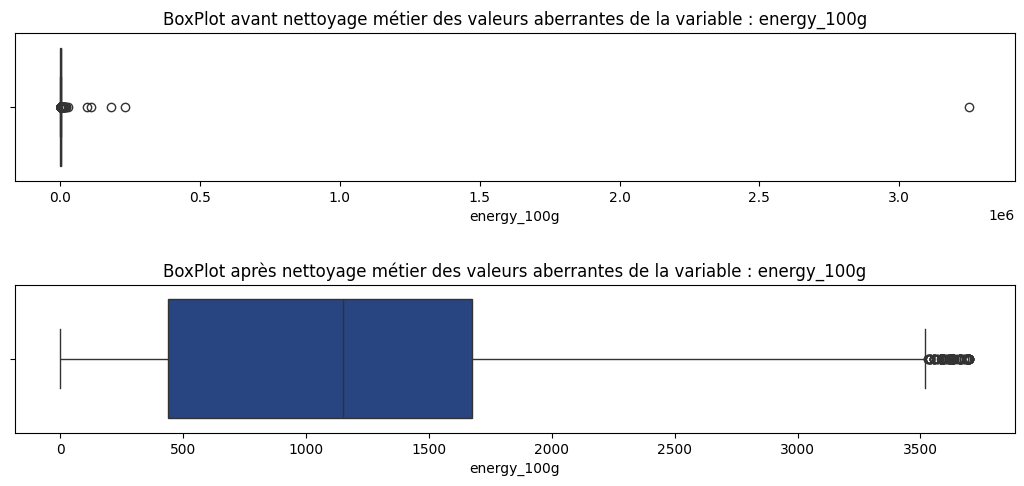

In [28]:
# Définit la taille de la figure et ajuste les marges
plt.figure(figsize=(10,10))
plt.gcf().subplots_adjust(left=0, bottom=0.3, right=1, top=0.7, wspace=0, hspace=0.7)

# Premier sous-graphique : BoxPlot avant nettoyage
plt.subplot(2, 1, 1)
box_plot(data, 'energy_100g', '#193E90', "BoxPlot avant nettoyage métier des valeurs aberrantes de la variable : energy_100g")

# Deuxième sous-graphique : BoxPlot après nettoyage
plt.subplot(2, 1, 2)
box_plot(cleaned_data, 'energy_100g', '#193E90', "BoxPlot après nettoyage métier des valeurs aberrantes de la variable : energy_100g")

# Affiche le graphique
plt.show()

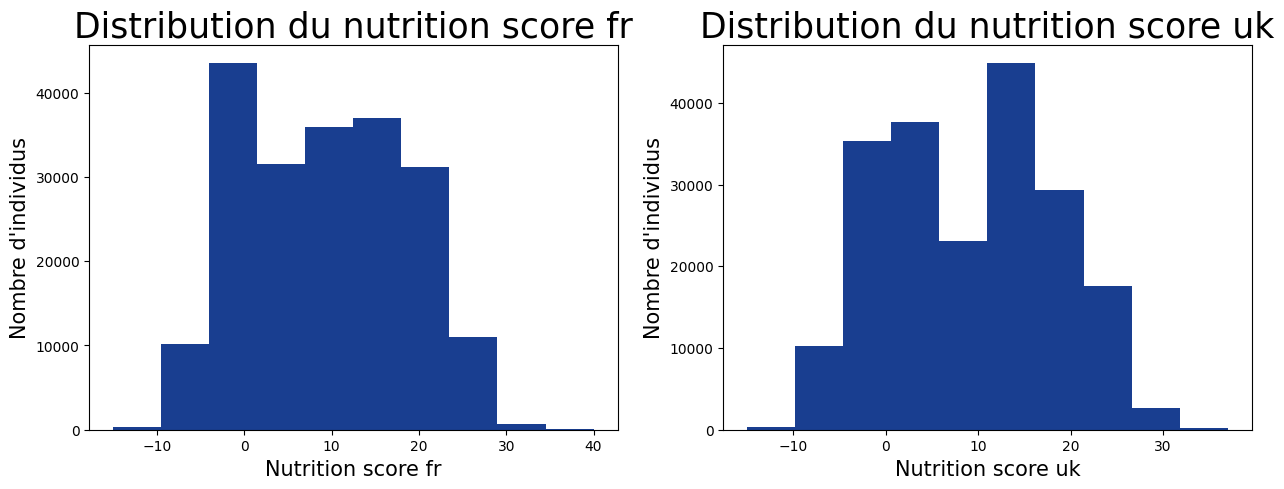

In [29]:
# Définit la taille de la figure
plt.figure(figsize=(15, 5))

# Premier sous-graphique : Histogramme du score nutritionnel français
plt.subplot(1, 2, 1)
histogram_plot(cleaned_data, 'nutrition_score_fr_100g', '#193E90', "Nutrition score fr", "Nombre d'individus", "Distribution du nutrition score fr")

# Deuxième sous-graphique : Histogramme du score nutritionnel britannique
plt.subplot(1, 2, 2)
histogram_plot(cleaned_data, 'nutrition_score_uk_100g', '#193E90', "Nutrition score uk", "Nombre d'individus", "Distribution du nutrition score uk")

# Affiche le graphique
plt.show()

In [30]:
# Liste des colonnes à exclure des nutriments
not_nutriments = ['nutrition_score_fr_100g', 'nutrition_score_uk_100g', 'energy_100g']

# Liste des colonnes se terminant par '_100g' et qui ne sont pas dans la liste des not_nutriments
nutriments = [col for col in cleaned_data.columns if col.endswith('_100g') and col not in not_nutriments]

# Affichage de la liste des colonnes de nutriments
nutriments

['fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [31]:
for col in nutriments:
    # Filtrer le DataFrame pour inclure uniquement les lignes où la valeur de chaque colonne de nutriments est comprise entre 0 et 100
    cleaned_data = cleaned_data.query(f"{col} >= 0 and {col} <= 100")
    # Afficher la forme du DataFrame après chaque filtrage
    print(col, " -> ", cleaned_data.shape)

fat_100g  ->  (213260, 36)
saturated_fat_100g  ->  (191526, 36)
carbohydrates_100g  ->  (191045, 36)
sugars_100g  ->  (186318, 36)
fiber_100g  ->  (161059, 36)
proteins_100g  ->  (160728, 36)
salt_100g  ->  (160098, 36)
sodium_100g  ->  (160095, 36)


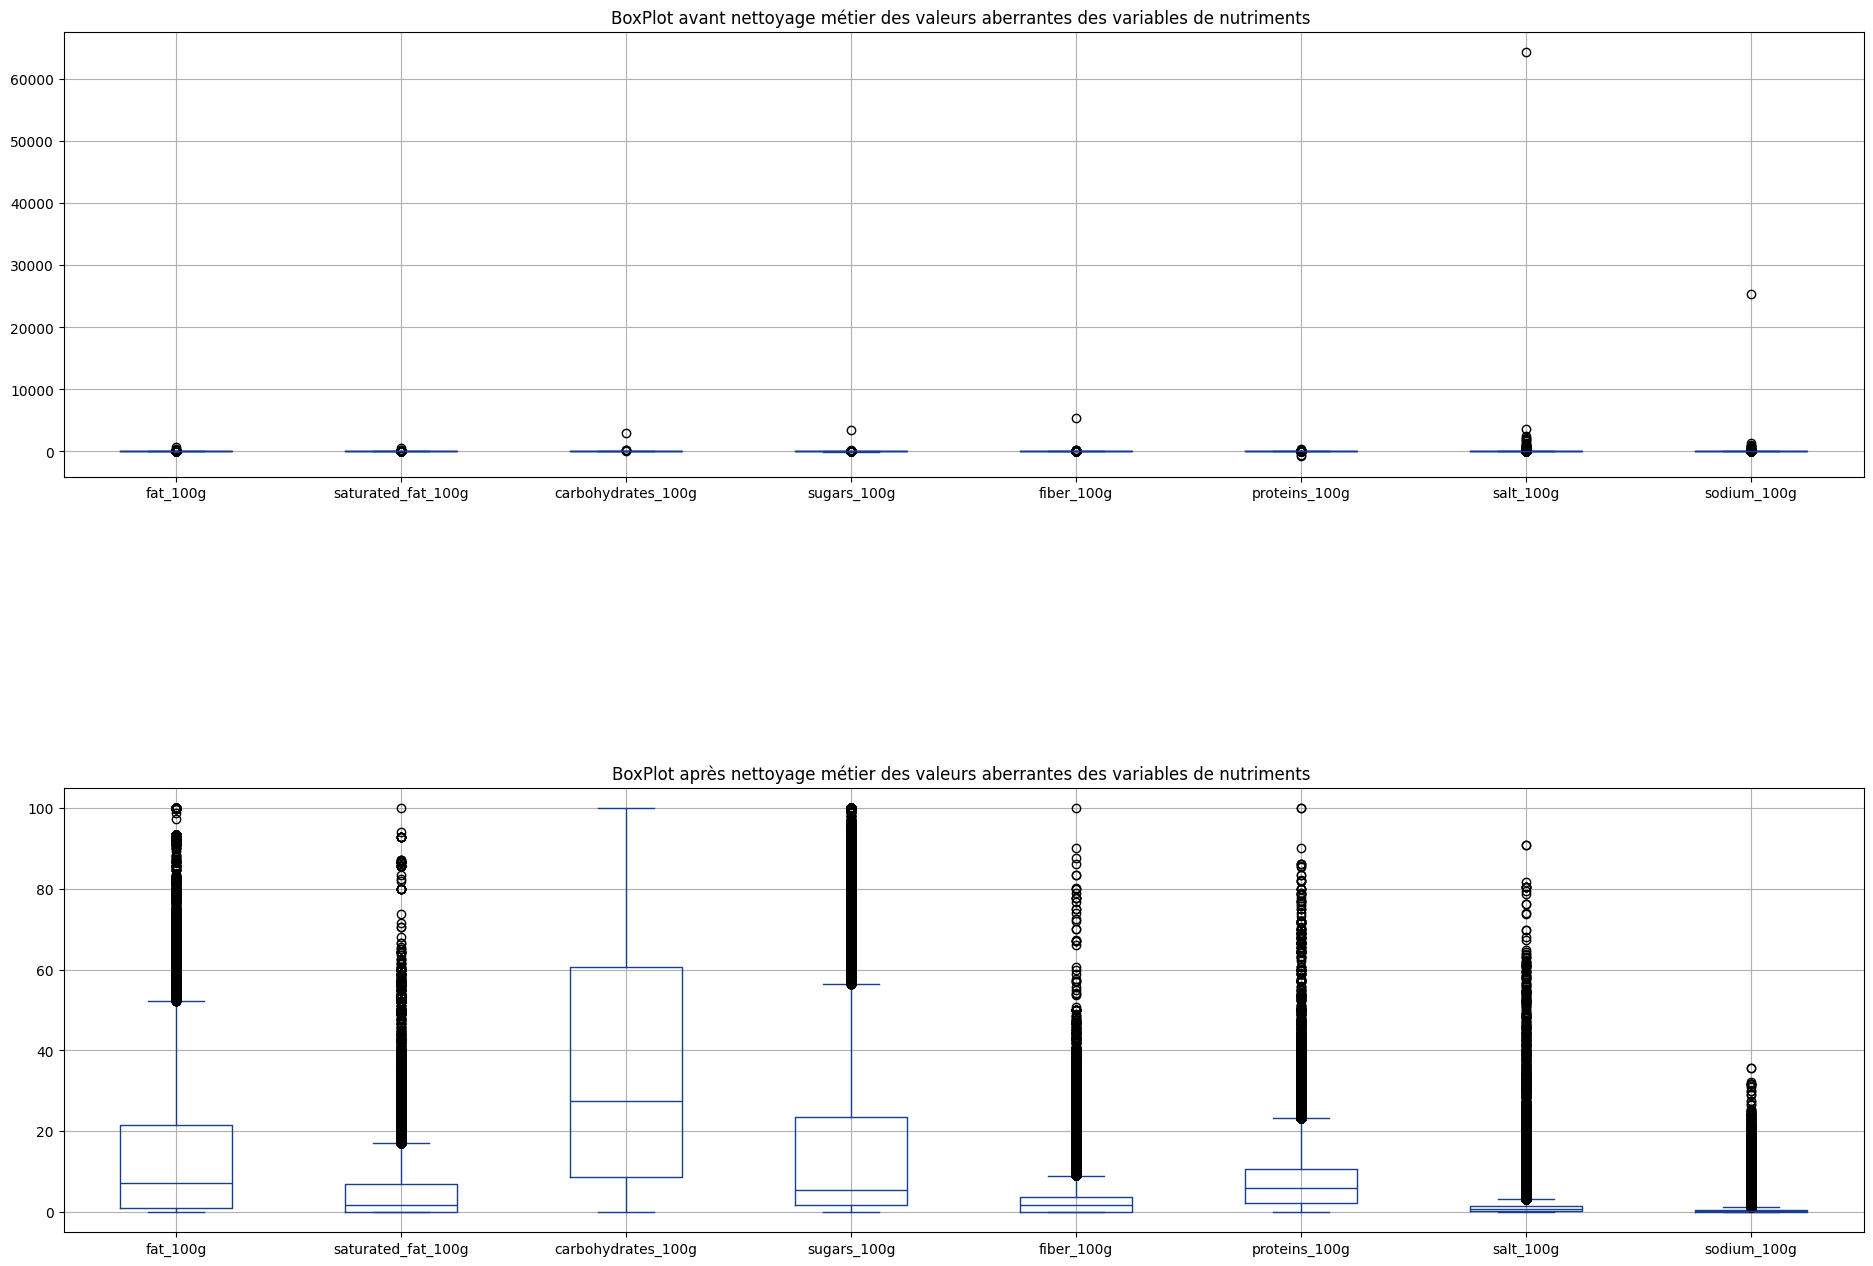

In [32]:
# Définit la taille de la figure et ajuste les marges
plt.figure(figsize=(18,30))
plt.gcf().subplots_adjust(left = 0, bottom = 0.3, right = 1, top = 0.7, wspace = 0, hspace = 0.7)

# Premier sous-graphique : BoxPlot avant nettoyage des valeurs aberrantes des variables de nutriments
plt.subplot(2, 1, 1)
box_plot(data, nutriments, '#193E90', "BoxPlot avant nettoyage métier des valeurs aberrantes des variables de nutriments column")

# Deuxième sous-graphique : BoxPlot après nettoyage des valeurs aberrantes des variables de nutriments
plt.subplot(2, 1, 2)
box_plot(cleaned_data, nutriments, '#193E90', "BoxPlot après nettoyage métier des valeurs aberrantes des variables de nutriments column")

In [33]:
tmp_data = cleaned_data.copy(deep=True)

    b. Valeurs atypiques 

In [34]:
def exclude_outliers(var, data):
    # Calcul des quartiles Q1 et Q3
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    # Calcul de l'écart interquartile (IQR)
    IQR = Q3 - Q1
    # Exclusion des valeurs aberrantes en utilisant la règle 1.5*IQR
    return data.query(f"{var} >= {Q1 - 1.5*IQR} and {var} <= {Q3 + 1.5*IQR}")


In [35]:
# Variable pour afficher le message "valeurs avant exclusion pour la variable --> "
av = "valeurs avant exclusion pour la variable --> " 
# Variable pour afficher le message "valeurs après exclusion pour la variable --> "
ap = "valeurs après exclusion pour la variable --> "
# Nom de la variable à analyser
e = 'energy_100g'

# Affiche le nombre de valeurs avant l'exclusion des valeurs aberrantes pour la variable 'energy_100g'
print(data[e].count(), av + e)

# Exclut les valeurs aberrantes pour la variable 'energy_100g' et affiche le nombre de valeurs après l'exclusion
cleaned_data = exclude_outliers(e, cleaned_data)
print(cleaned_data[e].count(), ap + e)

239292 valeurs avant exclusion pour la variable --> energy_100g
160083 valeurs après exclusion pour la variable --> energy_100g


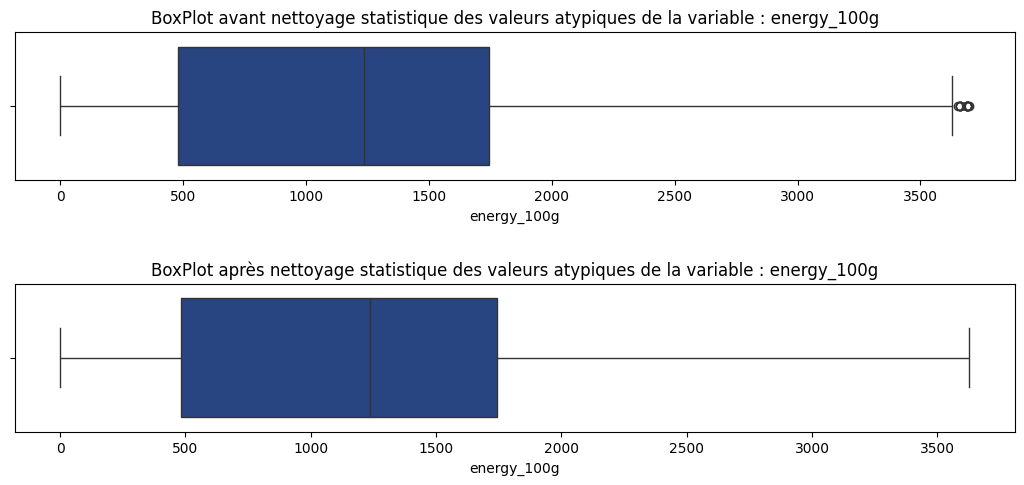

In [36]:
# Définit la taille de la figure et ajuste les marges
plt.figure(figsize=(10,10))
plt.gcf().subplots_adjust(left=0, bottom=0.3, right=1, top=0.7, wspace=0, hspace=0.7)

# Premier sous-graphique : BoxPlot avant nettoyage statistique des valeurs atypiques de la variable 'energy_100g'
plt.subplot(2, 1, 1)
box_plot(tmp_data, 'energy_100g', '#193E90', "BoxPlot avant nettoyage statistique des valeurs atypiques de la variable : energy_100g")

# Deuxième sous-graphique : BoxPlot après nettoyage statistique des valeurs atypiques de la variable 'energy_100g'
plt.subplot(2, 1, 2)
box_plot(cleaned_data, 'energy_100g', '#193E90', "BoxPlot après nettoyage statistique des valeurs atypiques de la variable : energy_100g")

# Affiche le graphique
plt.show()

In [37]:
for nut in nutriments:
    # Exclut les valeurs aberrantes pour chaque colonne de nutriments et affiche la forme du DataFrame après chaque exclusion
    cleaned_data = exclude_outliers(nut, cleaned_data)
    print(nut, ' -> ', cleaned_data.shape)

fat_100g  ->  (156516, 36)
saturated_fat_100g  ->  (145490, 36)
carbohydrates_100g  ->  (145490, 36)
sugars_100g  ->  (136014, 36)
fiber_100g  ->  (126784, 36)
proteins_100g  ->  (121328, 36)
salt_100g  ->  (115484, 36)
sodium_100g  ->  (114058, 36)


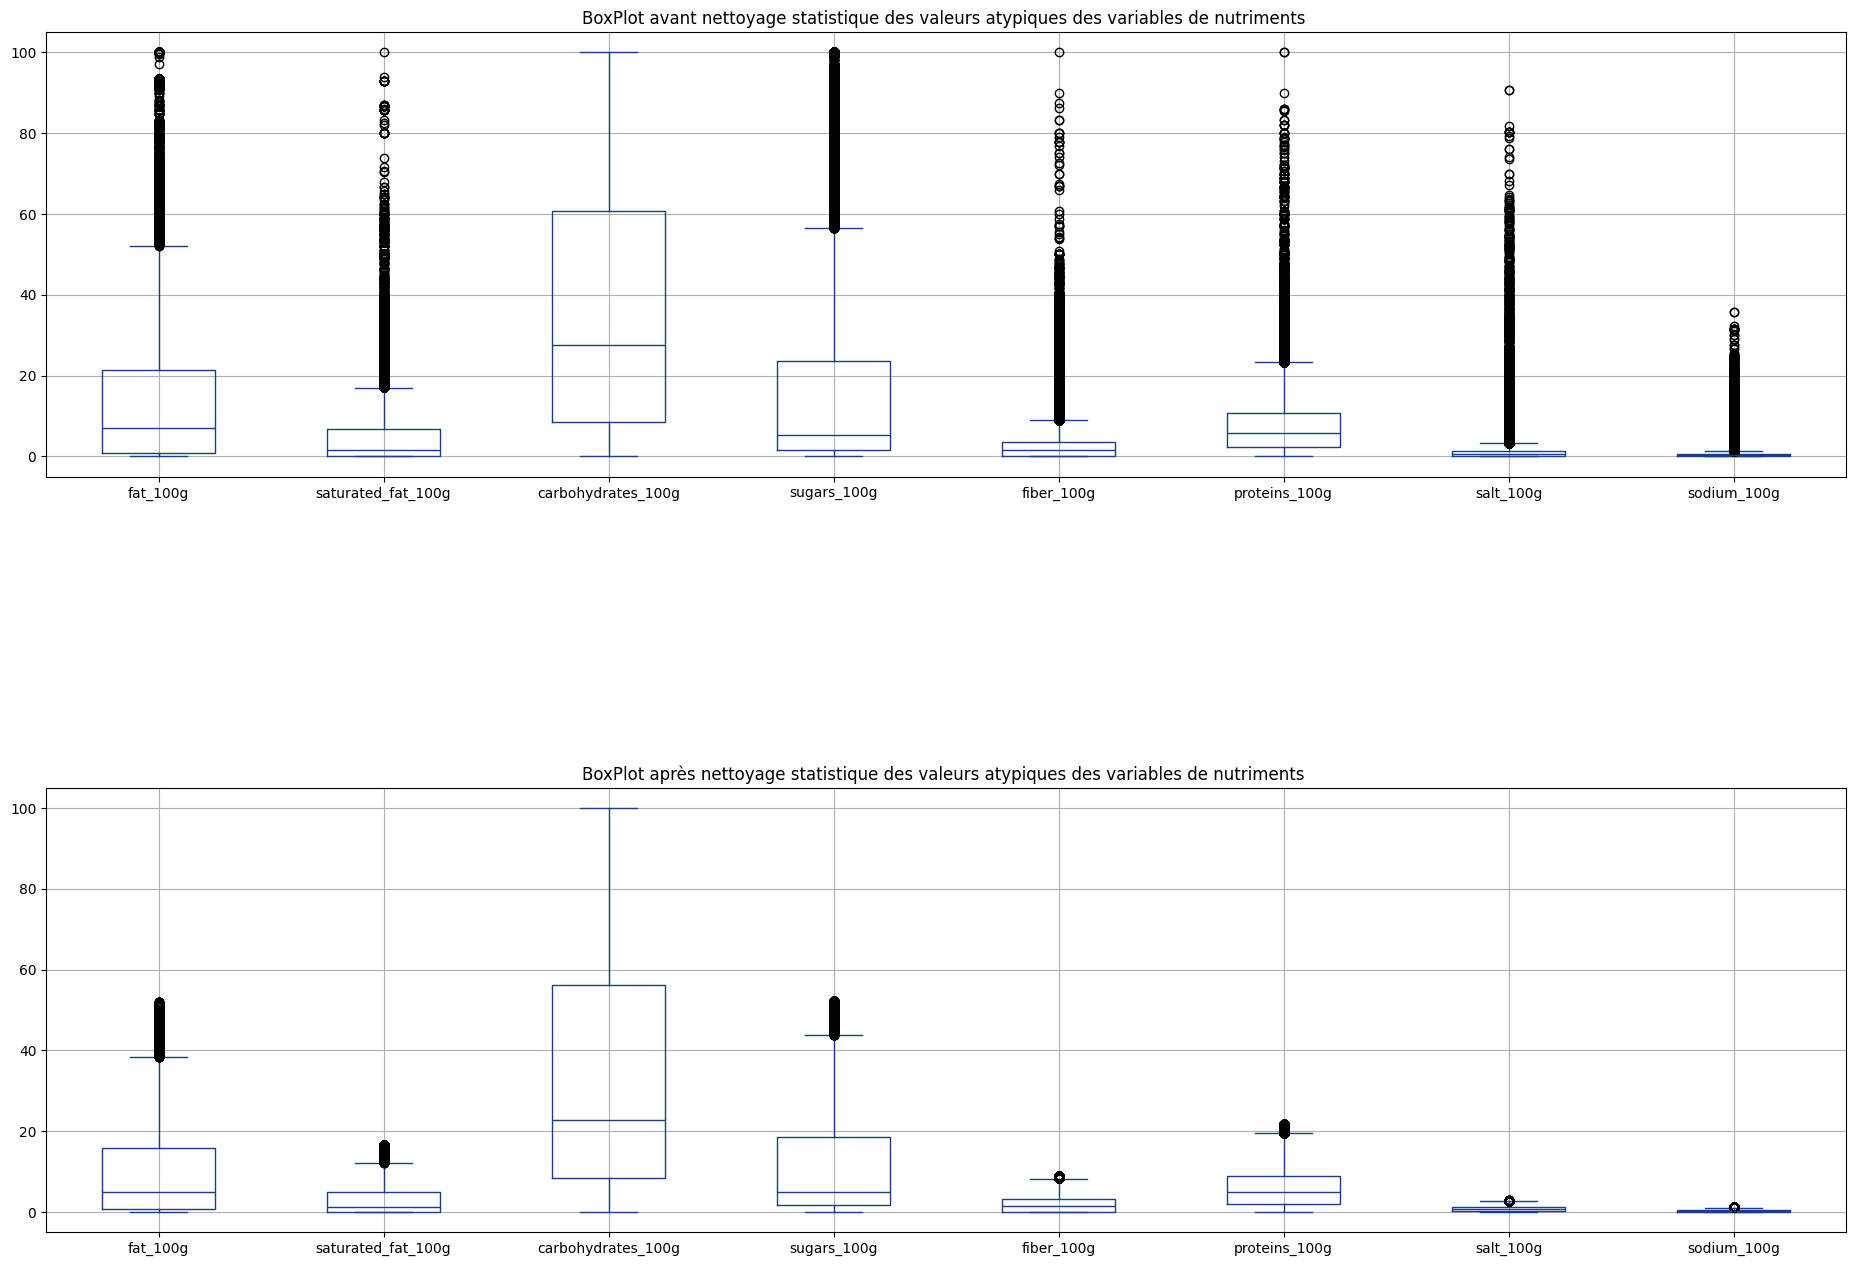

In [38]:
# Définit la taille de la figure et ajuste les marges
plt.figure(figsize=(18,30))
plt.gcf().subplots_adjust(left = 0, bottom = 0.3, right = 1, top = 0.7, wspace = 0, hspace = 0.7)

# Premier sous-graphique : BoxPlot avant nettoyage statistique des valeurs atypiques des variables de nutriments
plt.subplot(2, 1, 1)
box_plot(tmp_data, nutriments, '#193E90', "BoxPlot avant nettoyage statistique des valeurs atypiques des variables de nutriments column")

# Deuxième sous-graphique : BoxPlot après nettoyage statistique des valeurs atypiques des variables de nutriments
plt.subplot(2, 1, 2)
box_plot(cleaned_data, nutriments, '#193E90', "BoxPlot après nettoyage statistique des valeurs atypiques des variables de nutriments column")

D. Traitement des colonnes

In [39]:
cleaned_data.dtypes.value_counts()

object     22
float64    14
Name: count, dtype: int64

In [40]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114058 entries, 2 to 320763
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     114058 non-null  object 
 1   url                                      114058 non-null  object 
 2   creator                                  114058 non-null  object 
 3   created_t                                114058 non-null  object 
 4   created_datetime                         114058 non-null  object 
 5   last_modified_t                          114058 non-null  object 
 6   last_modified_datetime                   114058 non-null  object 
 7   product_name                             113907 non-null  object 
 8   brands                                   112720 non-null  object 
 9   brands_tags                              112720 non-null  object 
 10  countries                            

    a. Traitement des colonnes avec des dates

In [41]:
# Convertit la colonne 'created_datetime' & 'last_modified_datetime' en datetime
cleaned_data['created_datetime'] = pd.to_datetime(cleaned_data['created_datetime'], format="%Y-%m-%dT%H:%M:%SZ")
cleaned_data['last_modified_datetime'] = pd.to_datetime(cleaned_data['last_modified_datetime'], format="%Y-%m-%dT%H:%M:%SZ")

In [42]:
cleaned_data.dtypes.value_counts()

object            20
float64           14
datetime64[ns]     2
Name: count, dtype: int64

In [43]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114058 entries, 2 to 320763
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     114058 non-null  object        
 1   url                                      114058 non-null  object        
 2   creator                                  114058 non-null  object        
 3   created_t                                114058 non-null  object        
 4   created_datetime                         114058 non-null  datetime64[ns]
 5   last_modified_t                          114058 non-null  object        
 6   last_modified_datetime                   114058 non-null  datetime64[ns]
 7   product_name                             113907 non-null  object        
 8   brands                                   112720 non-null  object        
 9   brands_tags                    

    b. Traitement des variables catégorielles

In [44]:
# Convertit toutes les colonnes de type objet en catégories
for col in cleaned_data.select_dtypes('object'):
    cleaned_data[col] = cleaned_data[col].astype("category")

# Affiche des informations sur le DataFrame pour vérifier les types de données
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114058 entries, 2 to 320763
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     114058 non-null  category      
 1   url                                      114058 non-null  category      
 2   creator                                  114058 non-null  category      
 3   created_t                                114058 non-null  category      
 4   created_datetime                         114058 non-null  datetime64[ns]
 5   last_modified_t                          114058 non-null  category      
 6   last_modified_datetime                   114058 non-null  datetime64[ns]
 7   product_name                             113907 non-null  category      
 8   brands                                   112720 non-null  category      
 9   brands_tags                    

In [45]:
# Identification les colonnes numériques
cleaned_data.select_dtypes(include=['float64']).columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g',
       'nutrition_score_uk_100g'],
      dtype='object')

In [46]:
# Liste des noms de colonnes contenant des valeurs numériques incorrectes
false_num_columns = ['additives_n', "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n"]

# Pour chaque colonne dans la liste false_num_columns
for col in false_num_columns:
    # Affiche les valeurs uniques de la colonne
    print(cleaned_data[col].unique())

[ 0.  1.  3.  2.  5.  4. 11.  8.  7. 10.  6. nan  9. 18. 22. 13. 19. 17.
 25. 12. 21. 14. 16. 20. 24. 15. 26. 28. 23. 27. 29. 31.]
[ 0. nan  1.  2.]
[ 0.  1. nan  2.  3.  4.  6.  5.]


--> Variables qualitatives à convertir en variable catégorielle (ou variables quantitative discrètes)

In [47]:
# Convertit les colonnes contenant des valeurs numériques incorrectes en catégories
for col in false_num_columns:
    cleaned_data[col] = cleaned_data[col].astype("category")

# Affiche des informations sur le DataFrame pour vérifier les types de données mis à jour
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114058 entries, 2 to 320763
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     114058 non-null  category      
 1   url                                      114058 non-null  category      
 2   creator                                  114058 non-null  category      
 3   created_t                                114058 non-null  category      
 4   created_datetime                         114058 non-null  datetime64[ns]
 5   last_modified_t                          114058 non-null  category      
 6   last_modified_datetime                   114058 non-null  datetime64[ns]
 7   product_name                             113907 non-null  category      
 8   brands                                   112720 non-null  category      
 9   brands_tags                    

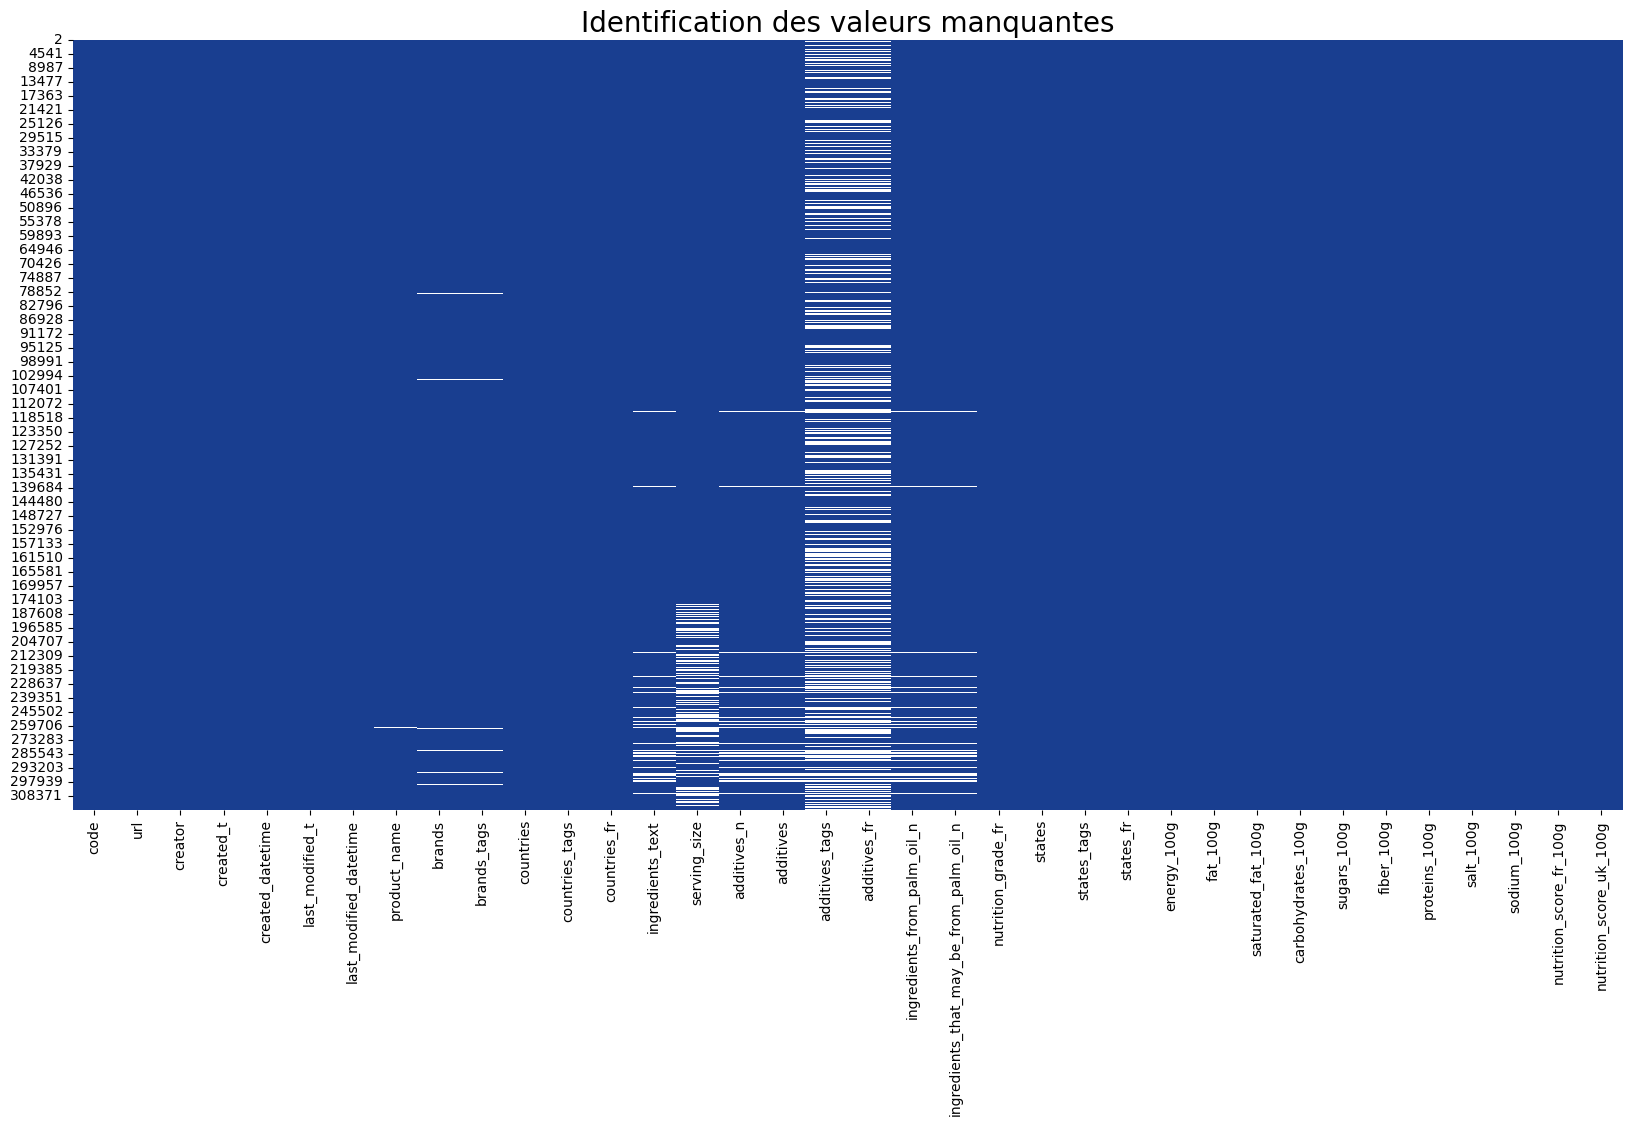

In [48]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#193E90", "white"]
sns.heatmap(cleaned_data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

In [49]:
# Initialisation d'un dictionnaire pour stocker les informations sur la complétion des données
completion = {}

# Pour chaque colonne dans les colonnes de cleaned_data
for var in cleaned_data.columns:
    # Compte le nombre de valeurs non nulles dans la colonne
    nbr_values = cleaned_data[var].notna().sum()
    # Compte le nombre de valeurs manquantes (NaN) dans la colonne
    na_values = cleaned_data[var].isna().sum()
    # Calcule le pourcentage de valeurs manquantes dans la colonne
    na_percent = 100 * na_values / cleaned_data.shape[0]
    # Stocke le nombre de valeurs non nulles et le pourcentage de valeurs manquantes dans le dictionnaire completion
    completion[var] = [nbr_values, na_percent]

# Affiche le nom de la colonne, le nombre de valeurs non nulles et le pourcentage de valeurs manquantes
print('column_name : nbr_values -> percentage_of_Na', '\n')
for var in completion:
    nbr_values = completion[var][0]
    na_percent = completion[var][1]
    # Affiche les colonnes avec un pourcentage de valeurs manquantes supérieur ou égal à 20%
    if na_percent >= 20:
        print(f'{var} : {nbr_values}  -> {int(na_percent)}% Na')

column_name : nbr_values -> percentage_of_Na 

additives_tags : 73838  -> 35% Na
additives_fr : 73838  -> 35% Na


In [50]:
# Supprime les colonnes 'additives_tags' & 'additives_fr' du DataFrame cleaned_data
cleaned_data = cleaned_data.drop(['additives_tags', 'additives_fr'], axis=1)

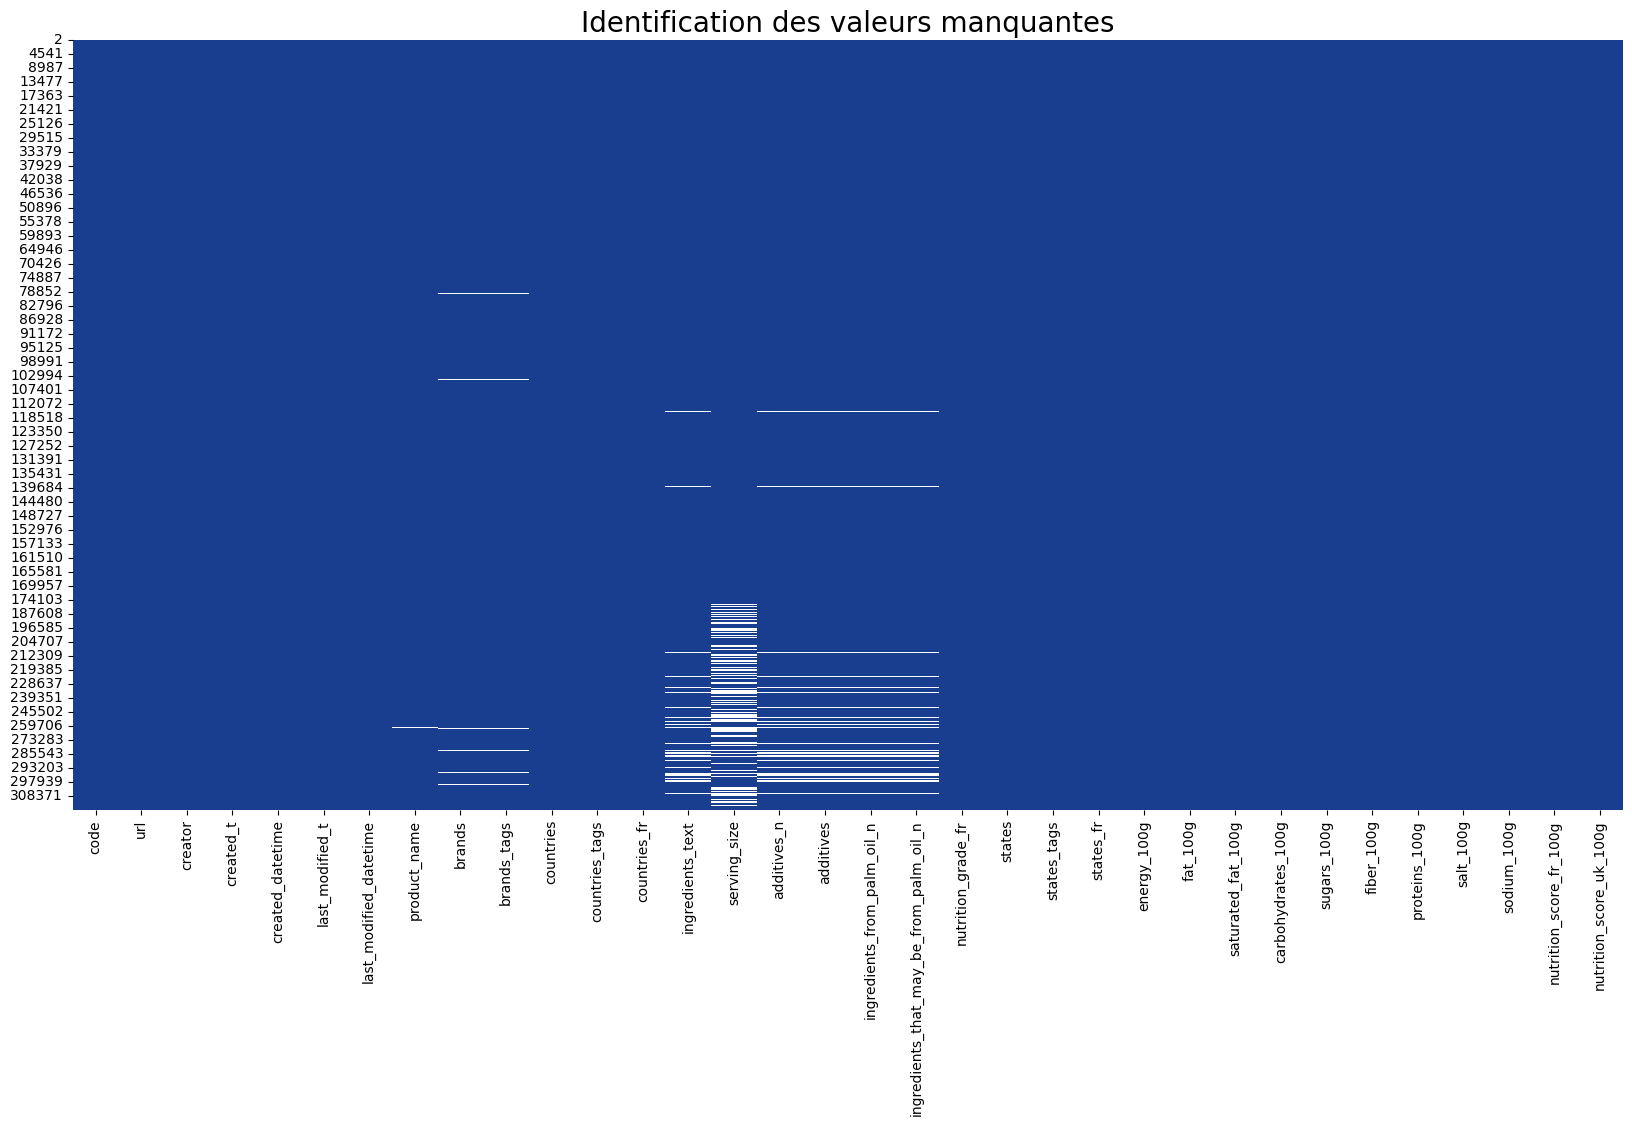

In [51]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes", fontsize=20)
custom_colors = ["#193E90", "white"]
sns.heatmap(cleaned_data.isna(), cbar=False, cmap=sns.color_palette(custom_colors))
plt.show()

E. Imputation des valeurs manquantes

In [52]:
imput_data = cleaned_data.copy(deep=True)

In [53]:
# Initialisation d'un dictionnaire pour stocker les informations sur la complétion des données
completion = {}

# Pour chaque colonne dans les colonnes de cleaned_data
for var in cleaned_data.columns:
    # Compte le nombre de valeurs non nulles dans la colonne
    nbr_values = cleaned_data[var].notna().sum()
    # Compte le nombre de valeurs manquantes (NaN) dans la colonne
    na_values = cleaned_data[var].isna().sum()
    # Calcule le pourcentage de valeurs manquantes dans la colonne
    na_percent = 100 * na_values / cleaned_data.shape[0]
    # Stocke le nombre de valeurs non nulles, de valeurs manquantes et le pourcentage de valeurs manquantes dans le dictionnaire completion
    completion[var] = [nbr_values, na_values, na_percent]

# Liste pour stocker les noms des colonnes à imputer
var_toimput = [] 

# Pour chaque colonne dans le dictionnaire completion
for var in completion:
    nbr_values = completion[var][0]
    na_values = completion[var][1]
    na_percent = completion[var][2]
    # Si le pourcentage de valeurs manquantes est supérieur à zéro
    if na_percent > 0:
        # Affiche le nom de la colonne, le nombre de valeurs non nulles, le nombre de valeurs manquantes et le pourcentage de valeurs manquantes
        print(f'{var} : {nbr_values}  -> {int(na_values)} Na = {int(na_percent)}% Na')
        # Ajoute le nom de la colonne à la liste var_toimput
        var_toimput.append(var)

product_name : 113907  -> 151 Na = 0% Na
brands : 112720  -> 1338 Na = 1% Na
brands_tags : 112720  -> 1338 Na = 1% Na
countries : 114048  -> 10 Na = 0% Na
countries_tags : 114048  -> 10 Na = 0% Na
countries_fr : 114048  -> 10 Na = 0% Na
ingredients_text : 110469  -> 3589 Na = 3% Na
serving_size : 102737  -> 11321 Na = 9% Na
additives_n : 110469  -> 3589 Na = 3% Na
additives : 110456  -> 3602 Na = 3% Na
ingredients_from_palm_oil_n : 110469  -> 3589 Na = 3% Na
ingredients_that_may_be_from_palm_oil_n : 110469  -> 3589 Na = 3% Na
nutrition_grade_fr : 113890  -> 168 Na = 0% Na
nutrition_score_fr_100g : 113890  -> 168 Na = 0% Na
nutrition_score_uk_100g : 113890  -> 168 Na = 0% Na


    a. Variables quantitatives

In [54]:
# Liste des colonnes quantitatives à imputer
var_quant_toimput = [col for col in var_toimput if cleaned_data[col].dtypes == "float64"]

# Pour chaque colonne quantitative à imputer
for col in var_quant_toimput:
    # Récupère les statistiques de complétion de la colonne depuis le dictionnaire completion
    nbr_values = completion[col][0]
    na_values = completion[col][1]
    na_percent = completion[col][2]
    # Affiche les statistiques de la colonne
    print(f'{col} : {nbr_values}  -> {int(na_values)} Na = {int(na_percent)}% Na')

nutrition_score_fr_100g : 113890  -> 168 Na = 0% Na
nutrition_score_uk_100g : 113890  -> 168 Na = 0% Na


        - Imputation par la moyenne ou la médiane ou la valeur la plus fréquente : 

In [55]:
# Pour chaque colonne quantitative à imputer
for col in var_quant_toimput:
    # Affiche la moyenne arrondie à deux décimales
    print(col, " : moyenne = ", cleaned_data[col].mean().round(2))
    # Affiche la médiane arrondie à deux décimales
    print(col, " : médiane = ", cleaned_data[col].median().round(2))
    # Affiche la valeur la plus fréquente
    print(col, " : valeur la plus fréquente = ", cleaned_data[col].mode()[0].round(2))

nutrition_score_fr_100g  : moyenne =  6.59
nutrition_score_fr_100g  : médiane =  4.0
nutrition_score_fr_100g  : valeur la plus fréquente =  1.0
nutrition_score_uk_100g  : moyenne =  6.45
nutrition_score_uk_100g  : médiane =  4.0
nutrition_score_uk_100g  : valeur la plus fréquente =  1.0


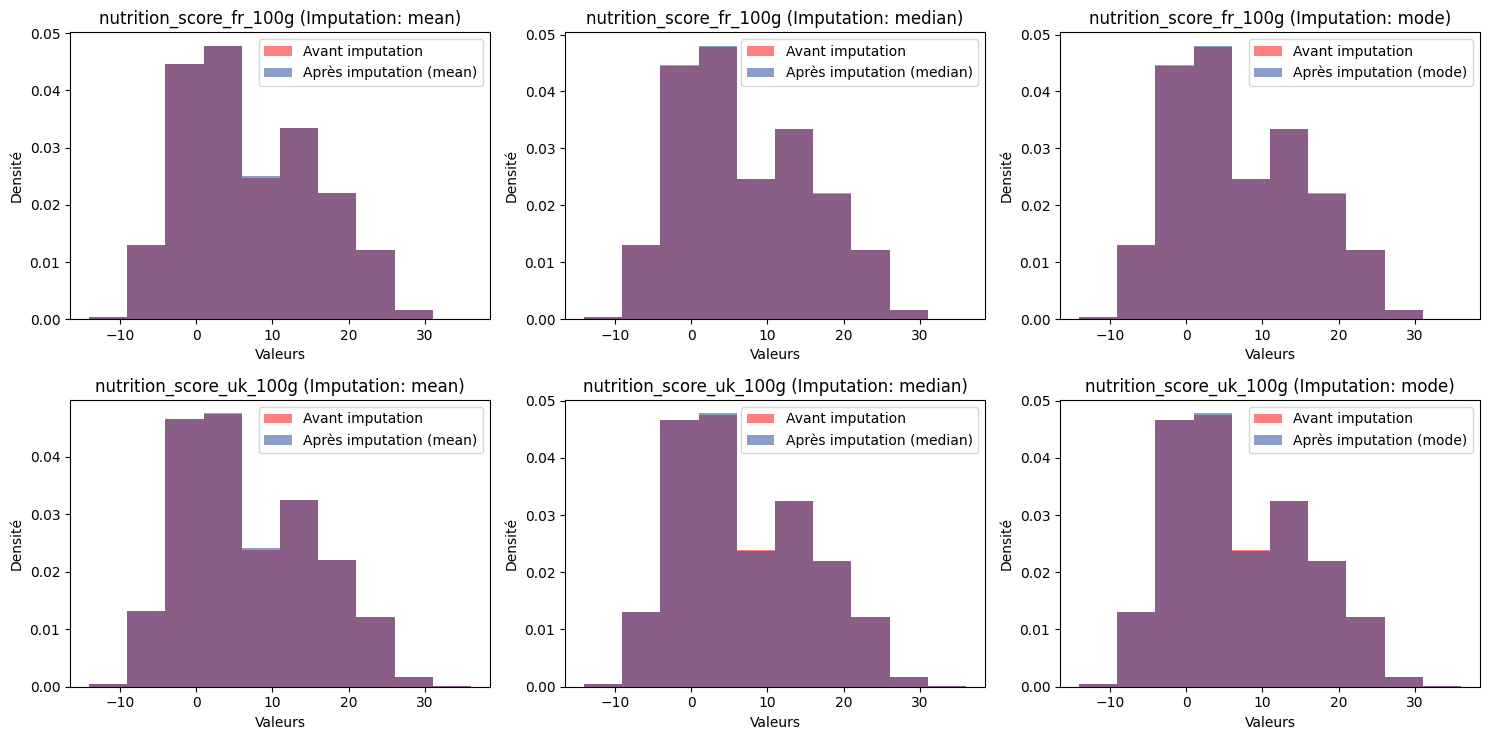

In [56]:
# Définition des méthodes d'imputation
imputation_methods = ['mean', 'median', 'mode']

# Création de la figure et des sous-graphiques
fig, axs = plt.subplots(len(var_quant_toimput), len(imputation_methods), figsize=(15, 7.5))

# Boucle sur les variables quantitatives
for i, col in enumerate(var_quant_toimput):
    # Boucle sur les méthodes d'imputation
    for j, method in enumerate(imputation_methods):
        # Imputation des valeurs manquantes
        if method == 'mean':
            imputed_values = cleaned_data[col].fillna(cleaned_data[col].mean())
        elif method == 'median':
            imputed_values = cleaned_data[col].fillna(cleaned_data[col].median())
        elif method == 'mode':
            imputed_values = cleaned_data[col].fillna(cleaned_data[col].mode()[0])
        
        # Création de l'histogramme
        axs[i, j].hist(cleaned_data[col].dropna(), color='red', alpha=0.5, label='Avant imputation', density=True)
        axs[i, j].hist(imputed_values, color='#193E90', alpha=0.5, label=f'Après imputation ({method})', density=True)
        
        # Ajout de titres et légendes
        axs[i, j].set_title(f'{col} (Imputation: {method})')
        axs[i, j].set_xlabel('Valeurs')
        axs[i, j].set_ylabel('Densité')
        axs[i, j].legend()

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


--> L'imputation par la moyenne est la plus appropriée ici

In [57]:
# Pour chaque colonne quantitative à imputer
for col in var_quant_toimput:
    # Remplace les valeurs manquantes par la moyenne de la colonne
    imput_data.loc[imput_data[col].isnull(), col] = imput_data[col].mean()

    b. Variables qualitatives

In [58]:
# Liste des colonnes qualitatives à imputer
var_qual_toimput = [col for col in var_toimput if cleaned_data[col].dtypes == "category"]

# Pour chaque colonne qualitative à imputer
for col in var_qual_toimput:
    # Récupère les statistiques de complétion de la colonne depuis le dictionnaire completion
    nbr_values = completion[col][0]
    na_values = completion[col][1]
    na_percent = completion[col][2]
    # Affiche les statistiques de la colonne
    print(f'{col} : {nbr_values}  -> {int(na_values)} Na = {int(na_percent)}% Na')

product_name : 113907  -> 151 Na = 0% Na
brands : 112720  -> 1338 Na = 1% Na
brands_tags : 112720  -> 1338 Na = 1% Na
countries : 114048  -> 10 Na = 0% Na
countries_tags : 114048  -> 10 Na = 0% Na
countries_fr : 114048  -> 10 Na = 0% Na
ingredients_text : 110469  -> 3589 Na = 3% Na
serving_size : 102737  -> 11321 Na = 9% Na
additives_n : 110469  -> 3589 Na = 3% Na
additives : 110456  -> 3602 Na = 3% Na
ingredients_from_palm_oil_n : 110469  -> 3589 Na = 3% Na
ingredients_that_may_be_from_palm_oil_n : 110469  -> 3589 Na = 3% Na
nutrition_grade_fr : 113890  -> 168 Na = 0% Na


        - Imputation par la valeur la plus fréquente :

In [59]:
# Pour chaque colonne qualitative à imputer
for col in var_qual_toimput:
    # Affiche la valeur la plus fréquente pour la colonne
    print("Valeur la plus fréquente pour", col, ":", cleaned_data[col].mode()[0], "\n")

Valeur la plus fréquente pour product_name : Ice Cream 

Valeur la plus fréquente pour brands : Carrefour 

Valeur la plus fréquente pour brands_tags : carrefour 

Valeur la plus fréquente pour countries : US 

Valeur la plus fréquente pour countries_tags : en:united-states 

Valeur la plus fréquente pour countries_fr : États-Unis 

Valeur la plus fréquente pour ingredients_text : Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron), thiamin mononitrate, riboflavin, folic acid. 

Valeur la plus fréquente pour serving_size : 30 g (2 Tbsp) 

Valeur la plus fréquente pour additives_n : 0.0 

Valeur la plus fréquente pour additives :  [ semolina -> en:semolina  ]  [ wheat -> en:wheat  ]  [ durum-flour -> en:durum-flour  ]  [ flour -> en:flour  ]  [ wheat -> en:wheat  ]  [ niacin -> en:e375  -> exists  -- ok  ]  [ ferrous-sulfate -> en:ferrous-sulfate  ]  [ sulfate -> en:sulfate  ]  [ iron -> en:iron  ]  [ thiamin-mononitrate -> en:thiamin-mononitrate  ]  [ mononitrate -> e

--> L'imputation par la valeur la plus fréquente n'est pas appropriée ici

In [60]:
cleaned_data = imput_data.copy(deep=True)
cleaned_data.to_csv("../Data/cleaned_data.csv", index=False)